In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math as m
import random

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.model_selection import train_test_split

l1 = 7
l2 = 7
l3 = 7

In [2]:
def plot_coordinates(csv_file):
    df = pd.read_csv(csv_file)

    df["Time"] = range(len(df))

    fig, axes = plt.subplots(2, 1, figsize=(13, 7))  

    axes[0].plot(df["Time"], df["x_scaled"], label="x_scaled", color='r')
    axes[0].set_xlabel("Time", weight='bold')
    axes[0].set_ylabel("X Coordinate", weight='bold')
    axes[0].set_title("X Coordinate vs Time", weight='bold')
    axes[0].legend(prop={'weight': 'bold'})
    axes[0].grid(True)

    axes[1].plot(df["Time"], df["y_scaled"], label="y_scaled", color='b')
    axes[1].set_xlabel("Time", weight='bold')
    axes[1].set_ylabel("Y Coordinate", weight='bold')
    axes[1].set_title("Y Coordinate vs Time", weight='bold')
    axes[1].legend(prop={'weight': 'bold'})
    axes[1].grid(True)

    plt.tight_layout()
    plt.show()

In [3]:
def plot_subset_coordinates(csv_file, limit = 100):
    df = pd.read_csv(csv_file, nrows=limit)

    df["Time"] = range(len(df))

    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    axes[0].plot(df["Time"], df["x_scaled"], label="x_scaled", color='r')
    axes[0].set_xlabel("Time", weight='bold')
    axes[0].set_ylabel("X Coordinate", weight='bold')
    axes[0].set_title("X Coordinate vs Time", weight='bold')
    axes[0].legend(prop={'weight': 'bold'})
    axes[0].grid(True)

    axes[1].plot(df["Time"], df["y_scaled"], label="y_scaled", color='b')
    axes[1].set_xlabel("Time", weight='bold')
    axes[1].set_ylabel("Y Coordinate", weight='bold')
    axes[1].set_title("Y Coordinate vs Time", weight='bold')
    axes[1].legend(prop={'weight': 'bold'})
    axes[1].grid(True)

    plt.tight_layout()
    plt.show()

In [4]:
def displayWorkSpace(csv_file):
    data = pd.read_csv(csv_file)
    plt.scatter(data['x_scaled'], data['y_scaled'], color = 'lightsalmon')
    plt.xlabel('x-coordinate')
    plt.ylabel('y-coordinate')
    plt.grid()

In [5]:
def randomStepSizeDataset():
    data = []
    for i in range(1, 150001):
        q1 = round(random.uniform(0, m.pi), 2)
        q2 = round(random.uniform(-m.pi, 0), 2)
        q3 = round(random.uniform(-m.pi / 2, m.pi / 2))

        theta_o = round(m.degrees(q1) + m.degrees(q2) + m.degrees(q3), 2)
        x_s = round(l1 * m.cos(q1) + l2 * m.cos(q1 + q2) + l3 * m.cos(q1 + q2 + q3), 2)
        y_s = round(l1 * m.sin(q1) + l2 * m.sin(q1 + q2) + l3 * m.sin(q1 + q2 + q3), 2)
        data.append([x_s, y_s, theta_o, q1, q2, q3])

    df = pd.DataFrame(data, columns=['x_scaled', 'y_scaled', 'theta_scaled', 'q1_estimated', 'q2_estimated', 'q3_estimated'])

    df.to_csv('Three Link_Random Step Size.csv', index = False)

randomStepSizeDataset()

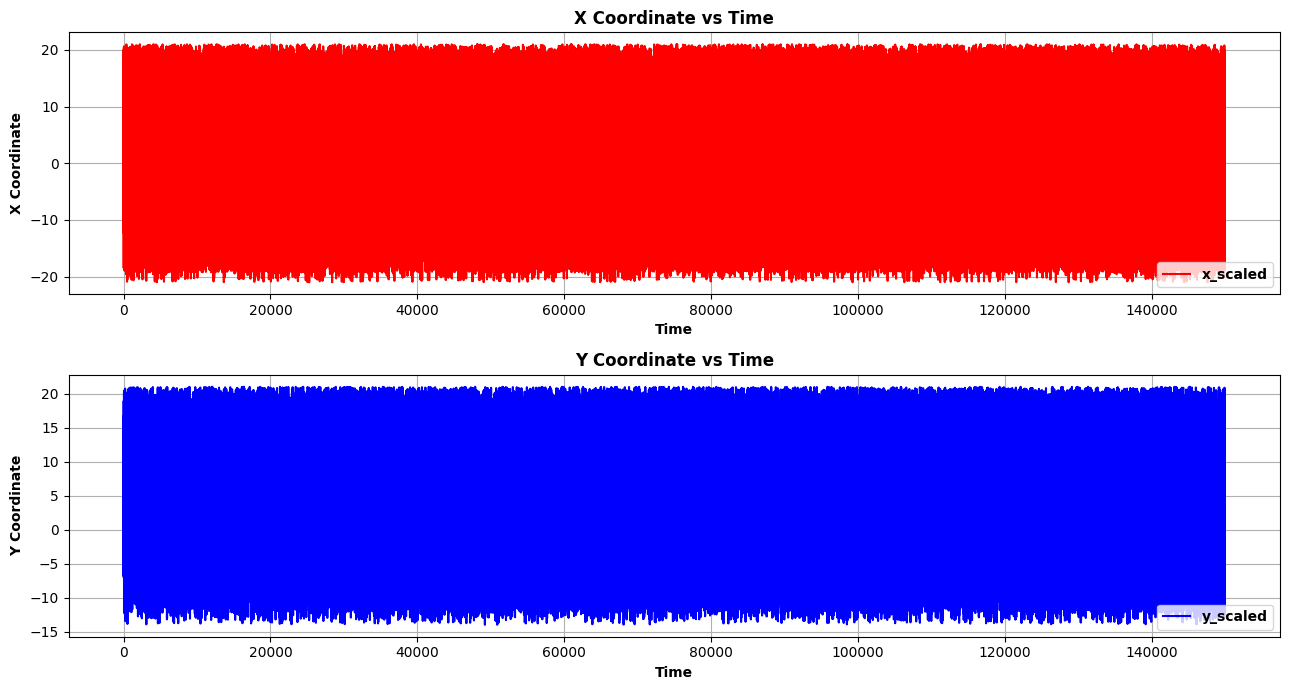

In [6]:
plot_coordinates("Three Link_Random Step Size.csv")

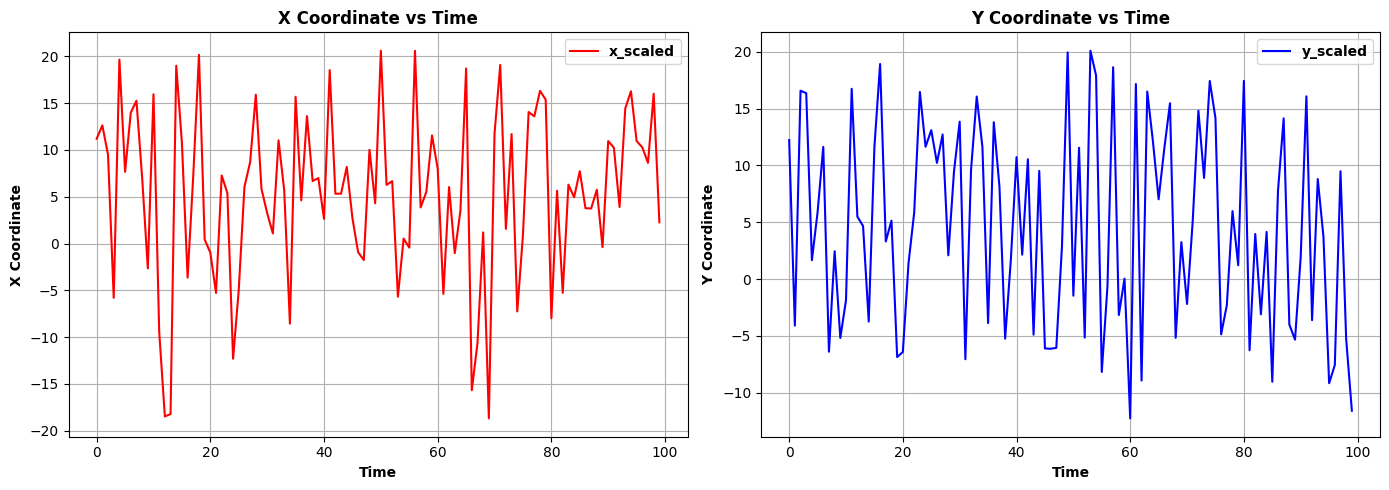

In [7]:
plot_subset_coordinates("Three Link_Random Step Size.csv")

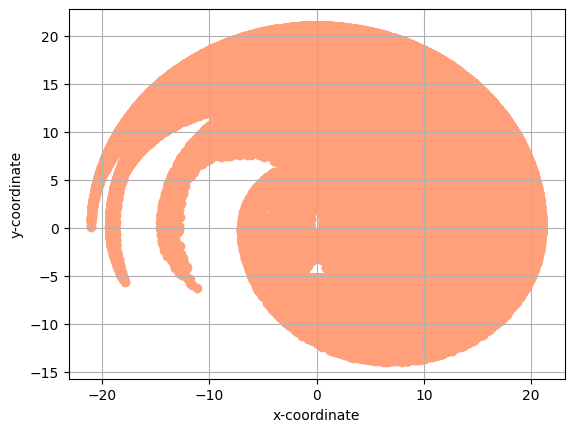

In [8]:
displayWorkSpace("Three Link_Random Step Size.csv")

In [9]:
def fixedStepSizeDataset(target_samples=150000):
    data = []
    
    individual_count = m.ceil(target_samples ** (1/3))
    
    q1_values = np.linspace(0, m.pi, individual_count)
    q2_values = np.linspace(-m.pi, 0, individual_count)
    q3_values = np.linspace(-m.pi / 2, m.pi / 2, individual_count)

    for q1 in q1_values:
        for q2 in q2_values:
            for q3 in q3_values:
                theta_o = round(m.degrees(q1) + m.degrees(q2) + m.degrees(q3), 2)
                x_s = round(l1 * m.cos(q1) + l2 * m.cos(q1 + q2) + l3 * m.cos(q1 + q2 + q3), 2)
                y_s = round(l1 * m.sin(q1) + l2 * m.sin(q1 + q2) + l3 * m.sin(q1 + q2 + q3), 2)
                data.append([x_s, y_s, theta_o, q1, q2, q3])
                if len(data) >= target_samples:
                    break
            if len(data) >= target_samples:
                break
        if len(data) >= target_samples:
            break

    df = pd.DataFrame(data, columns=['x_scaled', 'y_scaled', 'theta_scaled', 'q1_estimated', 'q2_estimated', 'q3_estimated'])
    df.to_csv('Three Link_Fixed Step Size.csv', index=False)

fixedStepSizeDataset()

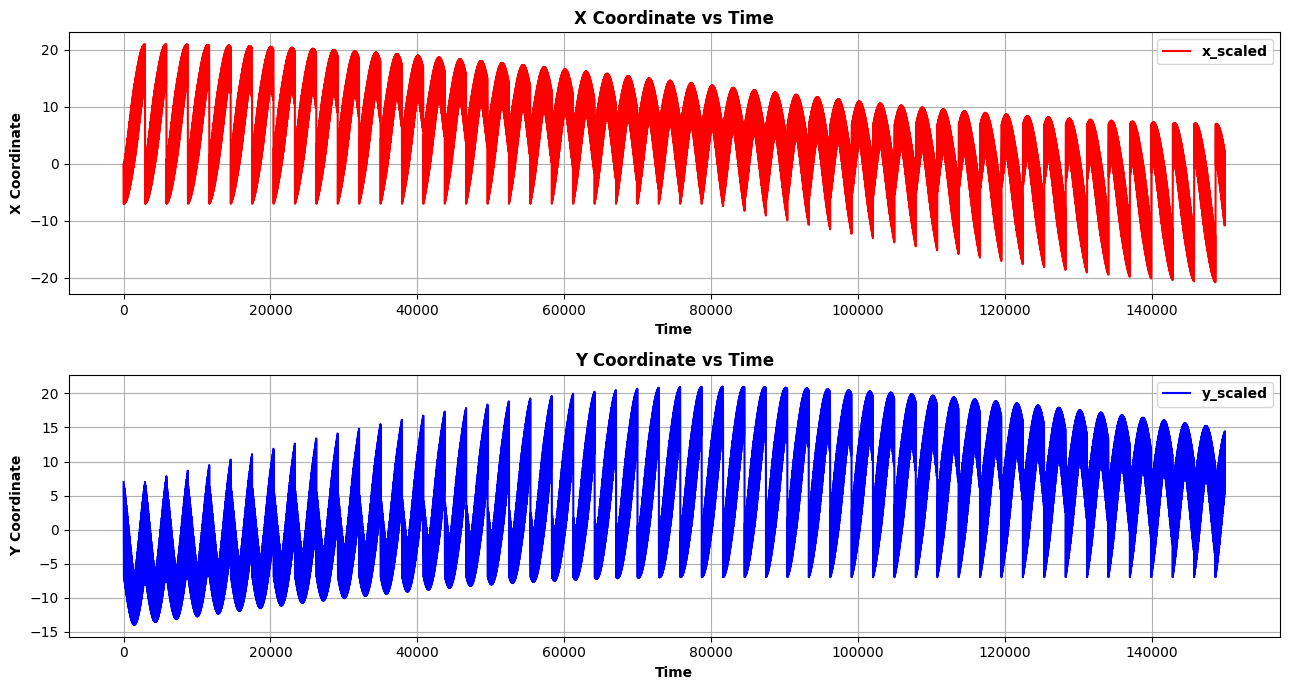

In [10]:
plot_coordinates("Three Link_Fixed Step Size.csv")

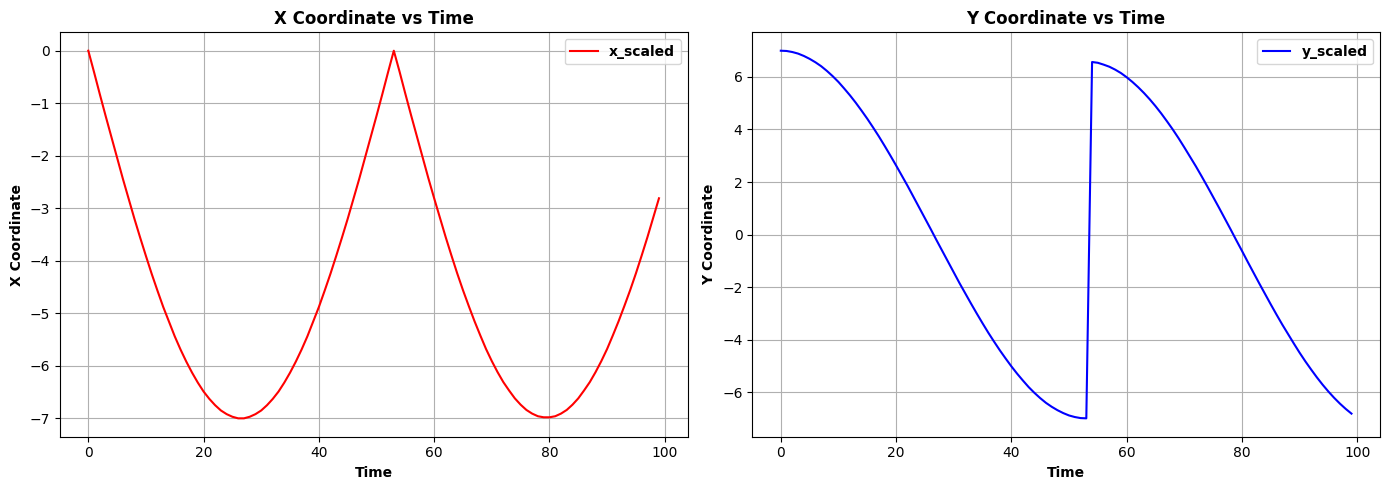

In [11]:
plot_subset_coordinates("Three Link_Fixed Step Size.csv")

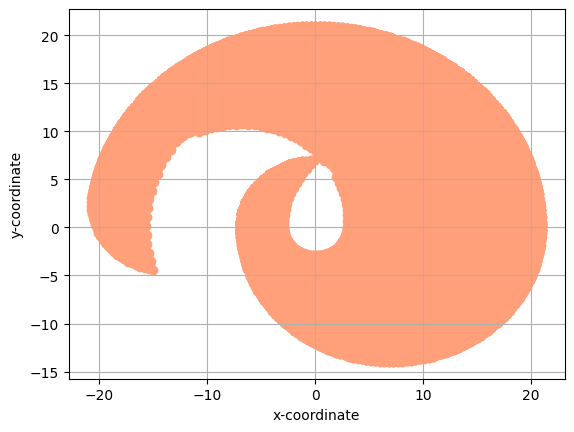

In [12]:
displayWorkSpace("Three Link_Fixed Step Size.csv")

In [13]:
def sinusoidalTrajectoryDataset(target_samples=150000):
    data = []
    individual_count = m.ceil(target_samples ** (1/3))
    t_values = np.linspace(0, 2 * m.pi, individual_count)

    q1_values = [((m.pi / 2) * (1 + m.sin(t)) / 2) for t in t_values]
    q2_values = [(-m.pi * (1 + m.sin(2 * t)) / 2) for t in t_values]
    q3_values = [((m.pi / 2) * m.sin(3 * t)) for t in t_values]

    for q1 in q1_values:
        for q2 in q2_values:
            for q3 in q3_values:
                theta_o = round(m.degrees(q1) + m.degrees(q2) + m.degrees(q3), 2)
                x_s = round(l1 * m.cos(q1) + l2 * m.cos(q1 + q2) + l3 * m.cos(q1 + q2 + q3), 2)
                y_s = round(l1 * m.sin(q1) + l2 * m.sin(q1 + q2) + l3 * m.sin(q1 + q2 + q3), 2)
                data.append([x_s, y_s, theta_o, q1, q2, q3])
                if len(data) >= target_samples:
                    break
            if len(data) >= target_samples:
                break
        if len(data) >= target_samples:
            break

    df = pd.DataFrame(data, columns=['x_scaled', 'y_scaled', 'theta_scaled', 'q1_estimated', 'q2_estimated', 'q3_estimated'])
    df.to_csv('Three Link_Sinusoidal Trajectory.csv', index=False)

sinusoidalTrajectoryDataset()

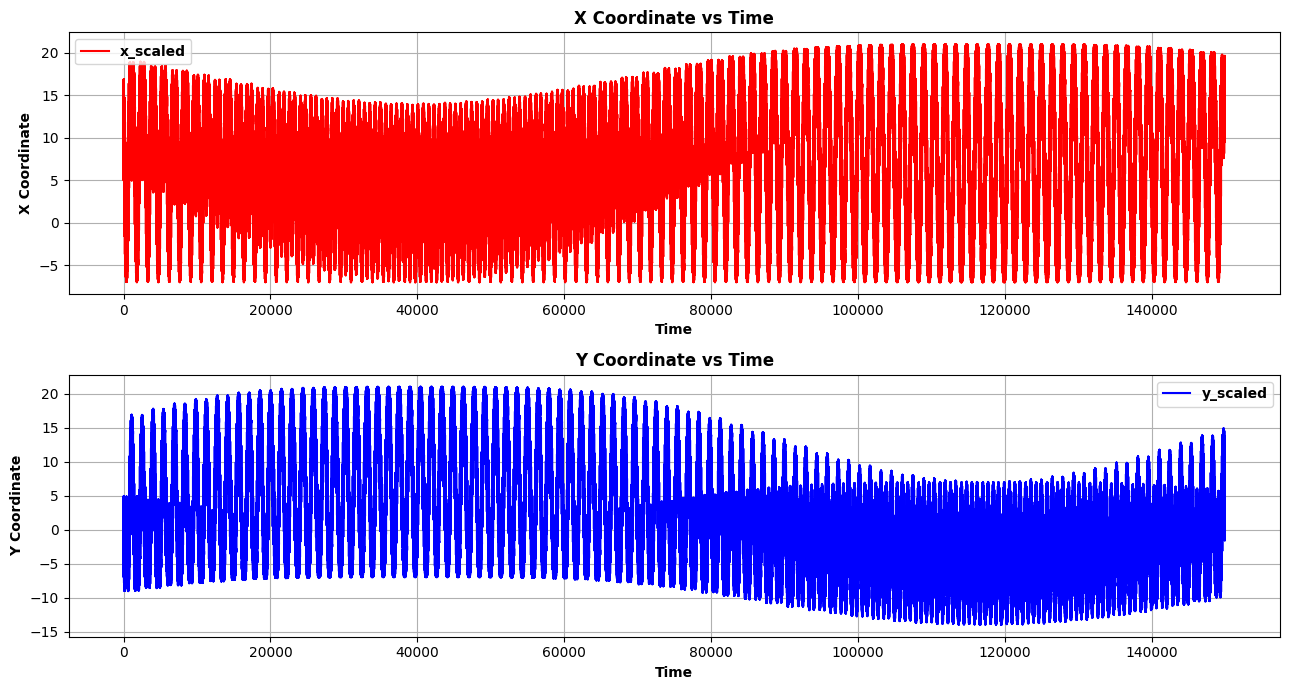

In [14]:
plot_coordinates("Three Link_Sinusoidal Trajectory.csv")

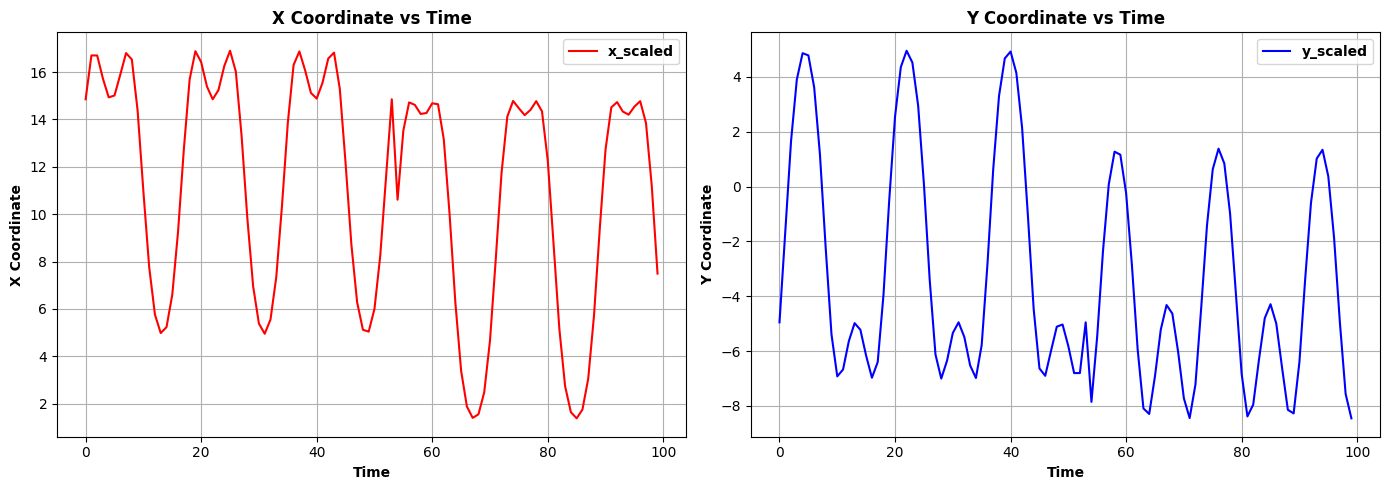

In [15]:
plot_subset_coordinates("Three Link_Sinusoidal Trajectory.csv")

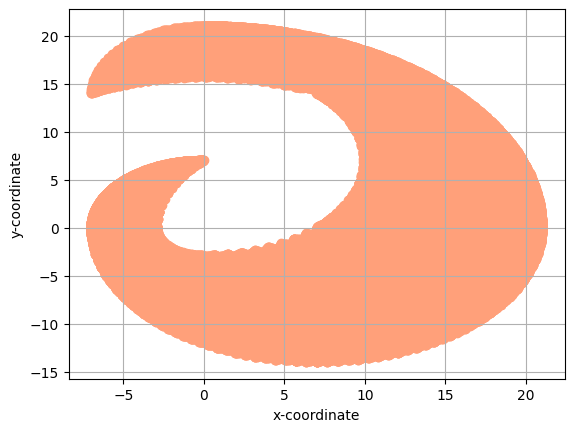

In [16]:
displayWorkSpace("Three Link_Sinusoidal Trajectory.csv")

In [17]:
def plot_training_history(history):
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    axes[0].plot(history.history['accuracy'])
    axes[0].plot(history.history['val_accuracy'])
    axes[0].set_title('Model Accuracy', weight='bold')
    axes[0].set_ylabel('Accuracy', weight='bold')
    axes[0].set_xlabel('Epoch', weight='bold')
    axes[0].legend(['Train', 'Validation'], loc='lower right', prop={'weight': 'bold'})

    axes[1].plot(history.history['loss'])
    axes[1].plot(history.history['val_loss'])
    axes[1].set_title('Model Loss', weight='bold')
    axes[1].set_ylabel('Loss', weight='bold')
    axes[1].set_xlabel('Epoch', weight='bold')
    axes[1].legend(['Train', 'Validation'], loc='upper right', prop={'weight': 'bold'})

    plt.tight_layout()
    plt.show()

Models

In [18]:
def ann(input_dim=3, output_dim=3, optimizer='adam'):
    model = Sequential([
        Dense(units=3, input_dim=input_dim, kernel_initializer='uniform'),
        Dense(units=100, kernel_initializer='uniform', activation='relu'),
        Dense(units=100, kernel_initializer='uniform', activation='relu'),
        Dense(units=output_dim, kernel_initializer='uniform', activation='linear')
    ])

    optimizers = {
        'adam': tf.keras.optimizers.Adam(learning_rate=0.001),
        'adamw': tf.keras.optimizers.AdamW(learning_rate=0.0003, weight_decay=0.006),
        'adadelta': tf.keras.optimizers.Adadelta(learning_rate=0.2),
        'adagrad': tf.keras.optimizers.Adagrad(learning_rate=0.02),
        'rmsprop': tf.keras.optimizers.RMSprop(learning_rate=0.0005),
        'sgd': tf.keras.optimizers.SGD(learning_rate=0.005, momentum=0.8),
    }

    optimizer_choice = optimizers.get(optimizer.lower())

    model.compile(optimizer=optimizer_choice, 
                  loss=tf.keras.losses.MeanSquaredError(), 
                  metrics=['accuracy'])
    return model

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

Random Sampling

In [19]:
data_Random = pd.read_csv('Three Link_Random Step Size.csv')

x_Random = data_Random.iloc[:, 0:3].values
y_Random = data_Random.iloc[:, 3:].values
x_train_Random, x_test_Random, y_train_Random, y_test_Random = train_test_split(x_Random, y_Random, test_size = 0.20)

In [20]:
ann_adam_Random = ann(optimizer='adam')
ann_adam_Random.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 12        
                                                                 
 dense_1 (Dense)             (None, 100)               400       
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 3)                 303       
                                                                 
Total params: 10815 (42.25 KB)
Trainable params: 10815 (42.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
history_ann_adam_Random = ann_adam_Random.fit(x_train_Random, y_train_Random, epochs = 200, validation_split = 0.2, callbacks=[early_stopping])

Epoch 1/200
3000/3000 [==============================] - 4s 1ms/step - loss: 0.1601 - accuracy: 0.9400 - val_loss: 0.0370 - val_accuracy: 0.9681
Epoch 2/200
3000/3000 [==============================] - 3s 997us/step - loss: 0.0327 - accuracy: 0.9719 - val_loss: 0.0246 - val_accuracy: 0.9687
Epoch 3/200
3000/3000 [==============================] - 3s 973us/step - loss: 0.0257 - accuracy: 0.9746 - val_loss: 0.0200 - val_accuracy: 0.9807
Epoch 4/200
3000/3000 [==============================] - 3s 969us/step - loss: 0.0218 - accuracy: 0.9779 - val_loss: 0.0175 - val_accuracy: 0.9843
Epoch 5/200
3000/3000 [==============================] - 3s 984us/step - loss: 0.0198 - accuracy: 0.9787 - val_loss: 0.0183 - val_accuracy: 0.9730
Epoch 6/200
3000/3000 [==============================] - 3s 961us/step - loss: 0.0192 - accuracy: 0.9788 - val_loss: 0.0154 - val_accuracy: 0.9817
Epoch 7/200
3000/3000 [==============================] - 3s 967us/step - loss: 0.0180 - accuracy: 0.9787 - val_loss: 0.0

In [22]:
test_loss_ann_adam_Random, test_acc_ann_adam_Random = ann_adam_Random.evaluate(x_test_Random, y_test_Random)
print('Testing the Model :')
print('Testing Loss :', test_loss_ann_adam_Random)
print('Testing Accuracy :', test_acc_ann_adam_Random)

938/938 [==============================] - 1s 676us/step - loss: 0.0071 - accuracy: 0.9903
Testing the Model :
Testing Loss : 0.007131037302315235
Testing Accuracy : 0.9903333187103271


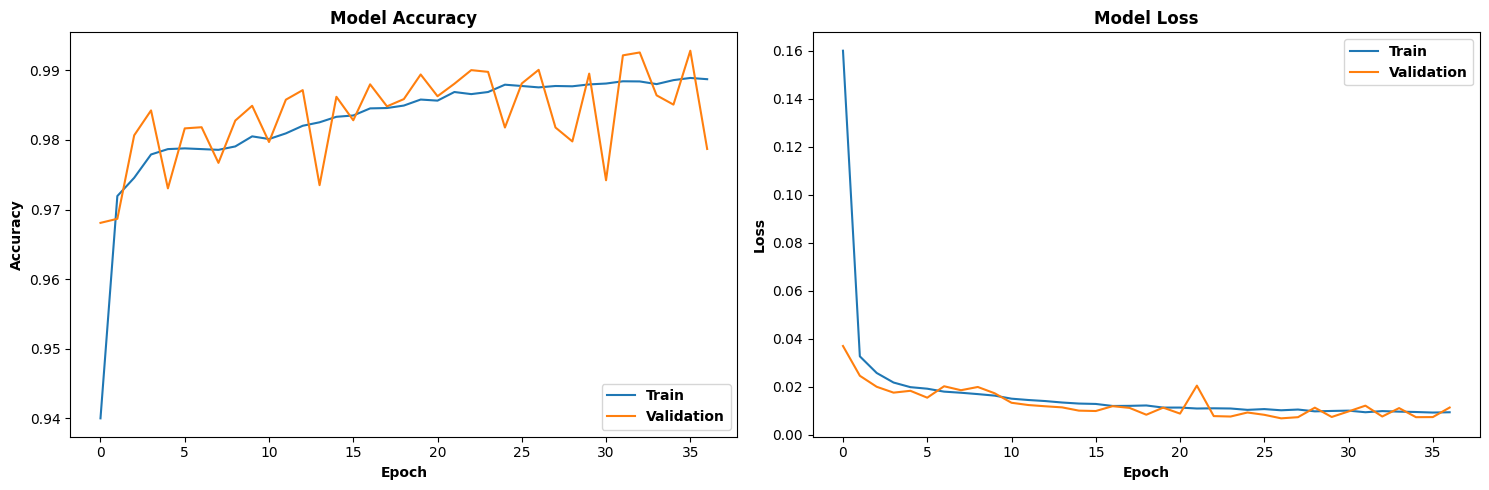

In [23]:
plot_training_history(history_ann_adam_Random)

In [24]:
ann_adamw_Random = ann(optimizer='adamw')
ann_adamw_Random.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 3)                 12        
                                                                 
 dense_5 (Dense)             (None, 100)               400       
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 3)                 303       
                                                                 
Total params: 10815 (42.25 KB)
Trainable params: 10815 (42.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
history_ann_adamw_Random = ann_adamw_Random.fit(x_train_Random, y_train_Random, epochs = 200, validation_split = 0.2, callbacks=[early_stopping])

Epoch 1/200
3000/3000 [==============================] - 4s 1ms/step - loss: 0.3297 - accuracy: 0.9129 - val_loss: 0.0577 - val_accuracy: 0.9409
Epoch 2/200
3000/3000 [==============================] - 3s 1ms/step - loss: 0.0457 - accuracy: 0.9462 - val_loss: 0.0368 - val_accuracy: 0.9473
Epoch 3/200
3000/3000 [==============================] - 3s 990us/step - loss: 0.0340 - accuracy: 0.9560 - val_loss: 0.0287 - val_accuracy: 0.9629
Epoch 4/200
3000/3000 [==============================] - 3s 976us/step - loss: 0.0288 - accuracy: 0.9608 - val_loss: 0.0255 - val_accuracy: 0.9685
Epoch 5/200
3000/3000 [==============================] - 3s 976us/step - loss: 0.0248 - accuracy: 0.9644 - val_loss: 0.0238 - val_accuracy: 0.9701
Epoch 6/200
3000/3000 [==============================] - 3s 1ms/step - loss: 0.0223 - accuracy: 0.9677 - val_loss: 0.0222 - val_accuracy: 0.9733
Epoch 7/200
3000/3000 [==============================] - 3s 972us/step - loss: 0.0203 - accuracy: 0.9706 - val_loss: 0.0205 

In [26]:
test_loss_ann_adamw_Random, test_acc_ann_adamw_Random = ann_adamw_Random.evaluate(x_test_Random, y_test_Random)
print('Testing the Model :')
print('Testing Loss :', test_loss_ann_adamw_Random)
print('Testing Accuracy :', test_acc_ann_adamw_Random)

938/938 [==============================] - 1s 992us/step - loss: 0.0066 - accuracy: 0.9871
Testing the Model :
Testing Loss : 0.00657598115503788
Testing Accuracy : 0.9871000051498413


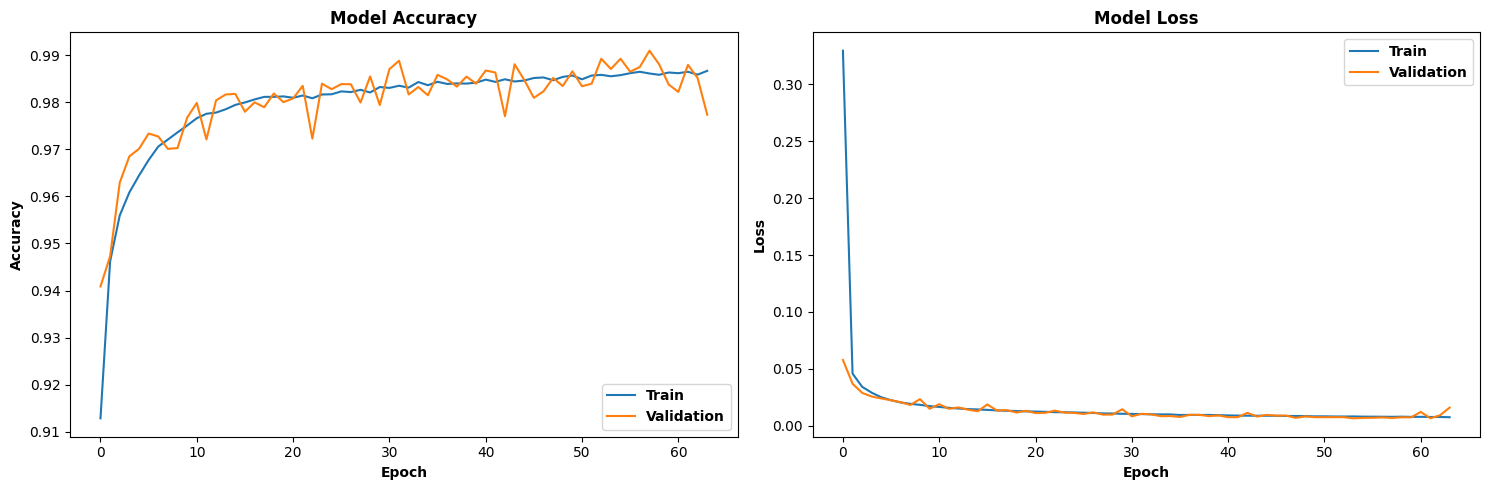

In [27]:
plot_training_history(history_ann_adamw_Random)

In [28]:
ann_adadelta_Random = ann(optimizer='adadelta')
ann_adadelta_Random.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 3)                 12        
                                                                 
 dense_9 (Dense)             (None, 100)               400       
                                                                 
 dense_10 (Dense)            (None, 100)               10100     
                                                                 
 dense_11 (Dense)            (None, 3)                 303       
                                                                 
Total params: 10815 (42.25 KB)
Trainable params: 10815 (42.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
history_ann_adadelta_Random = ann_adadelta_Random.fit(x_train_Random, y_train_Random, epochs = 200, validation_split = 0.2, callbacks=[early_stopping])

Epoch 1/200
3000/3000 [==============================] - 6s 2ms/step - loss: 0.2321 - accuracy: 0.9189 - val_loss: 0.0493 - val_accuracy: 0.9397
Epoch 2/200
3000/3000 [==============================] - 5s 2ms/step - loss: 0.0393 - accuracy: 0.9525 - val_loss: 0.0297 - val_accuracy: 0.9638
Epoch 3/200
3000/3000 [==============================] - 5s 2ms/step - loss: 0.0277 - accuracy: 0.9653 - val_loss: 0.0227 - val_accuracy: 0.9697
Epoch 4/200
3000/3000 [==============================] - 5s 2ms/step - loss: 0.0225 - accuracy: 0.9696 - val_loss: 0.0181 - val_accuracy: 0.9757
Epoch 5/200
3000/3000 [==============================] - 5s 2ms/step - loss: 0.0194 - accuracy: 0.9737 - val_loss: 0.0170 - val_accuracy: 0.9774
Epoch 6/200
3000/3000 [==============================] - 5s 2ms/step - loss: 0.0172 - accuracy: 0.9762 - val_loss: 0.0188 - val_accuracy: 0.9790
Epoch 7/200
3000/3000 [==============================] - 5s 2ms/step - loss: 0.0158 - accuracy: 0.9785 - val_loss: 0.0126 - val_ac

In [30]:
test_loss_ann_adadelta_Random, test_acc_ann_adadelta_Random = ann_adadelta_Random.evaluate(x_test_Random, y_test_Random)
print('Testing the Model :')
print('Testing Loss :', test_loss_ann_adadelta_Random)
print('Testing Accuracy :', test_acc_ann_adadelta_Random)

938/938 [==============================] - 1s 1ms/step - loss: 0.0048 - accuracy: 0.9882
Testing the Model :
Testing Loss : 0.004761331249028444
Testing Accuracy : 0.9882000088691711


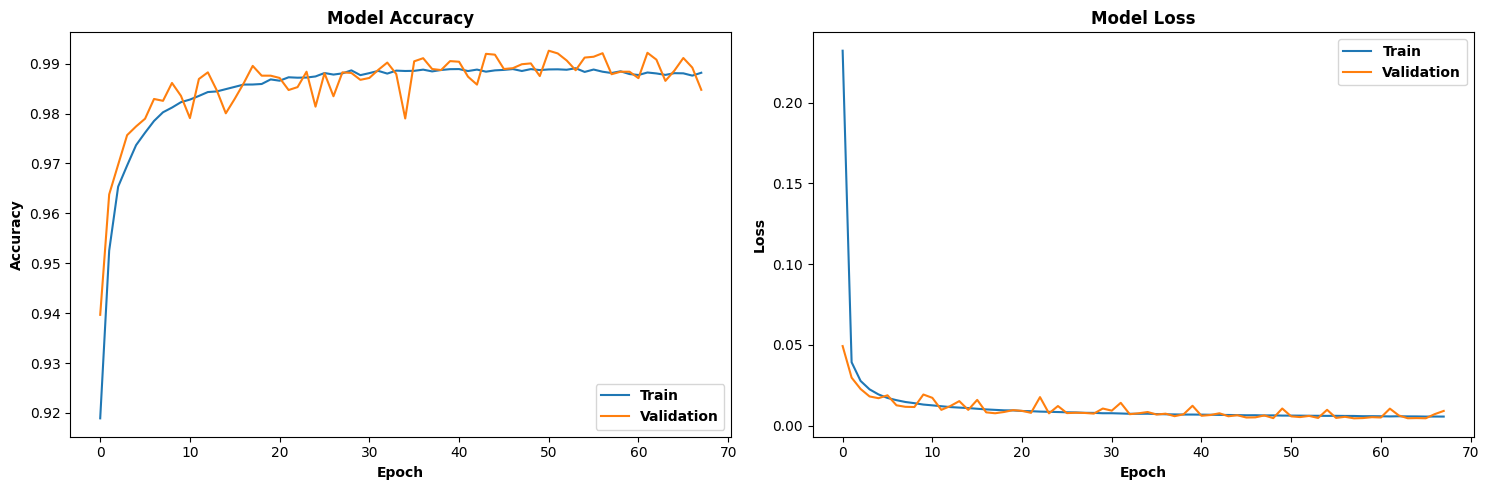

In [31]:
plot_training_history(history_ann_adadelta_Random)

In [32]:
ann_adagrad_Random = ann(optimizer='adagrad')
ann_adagrad_Random.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 3)                 12        
                                                                 
 dense_13 (Dense)            (None, 100)               400       
                                                                 
 dense_14 (Dense)            (None, 100)               10100     
                                                                 
 dense_15 (Dense)            (None, 3)                 303       
                                                                 
Total params: 10815 (42.25 KB)
Trainable params: 10815 (42.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
history_ann_adagrad_Random = ann_adagrad_Random.fit(x_train_Random, y_train_Random, epochs = 200, validation_split = 0.2, callbacks=[early_stopping])

Epoch 1/200
3000/3000 [==============================] - 5s 2ms/step - loss: 0.1788 - accuracy: 0.9266 - val_loss: 0.0420 - val_accuracy: 0.9585
Epoch 2/200
3000/3000 [==============================] - 5s 2ms/step - loss: 0.0312 - accuracy: 0.9650 - val_loss: 0.0235 - val_accuracy: 0.9743
Epoch 3/200
3000/3000 [==============================] - 4s 1ms/step - loss: 0.0222 - accuracy: 0.9732 - val_loss: 0.0205 - val_accuracy: 0.9712
Epoch 4/200
3000/3000 [==============================] - 4s 1ms/step - loss: 0.0180 - accuracy: 0.9779 - val_loss: 0.0157 - val_accuracy: 0.9800
Epoch 5/200
3000/3000 [==============================] - 4s 1ms/step - loss: 0.0156 - accuracy: 0.9804 - val_loss: 0.0164 - val_accuracy: 0.9827
Epoch 6/200
3000/3000 [==============================] - 4s 1ms/step - loss: 0.0140 - accuracy: 0.9813 - val_loss: 0.0133 - val_accuracy: 0.9839
Epoch 7/200
3000/3000 [==============================] - 4s 1ms/step - loss: 0.0128 - accuracy: 0.9825 - val_loss: 0.0130 - val_ac

In [34]:
test_loss_ann_adagrad_Random, test_acc_ann_adagrad_Random = ann_adagrad_Random.evaluate(x_test_Random, y_test_Random)
print('Testing the Model :')
print('Testing Loss :', test_loss_ann_adagrad_Random)
print('Testing Accuracy :', test_acc_ann_adagrad_Random)

938/938 [==============================] - 1s 988us/step - loss: 0.0031 - accuracy: 0.9925
Testing the Model :
Testing Loss : 0.003130793571472168
Testing Accuracy : 0.9925000071525574


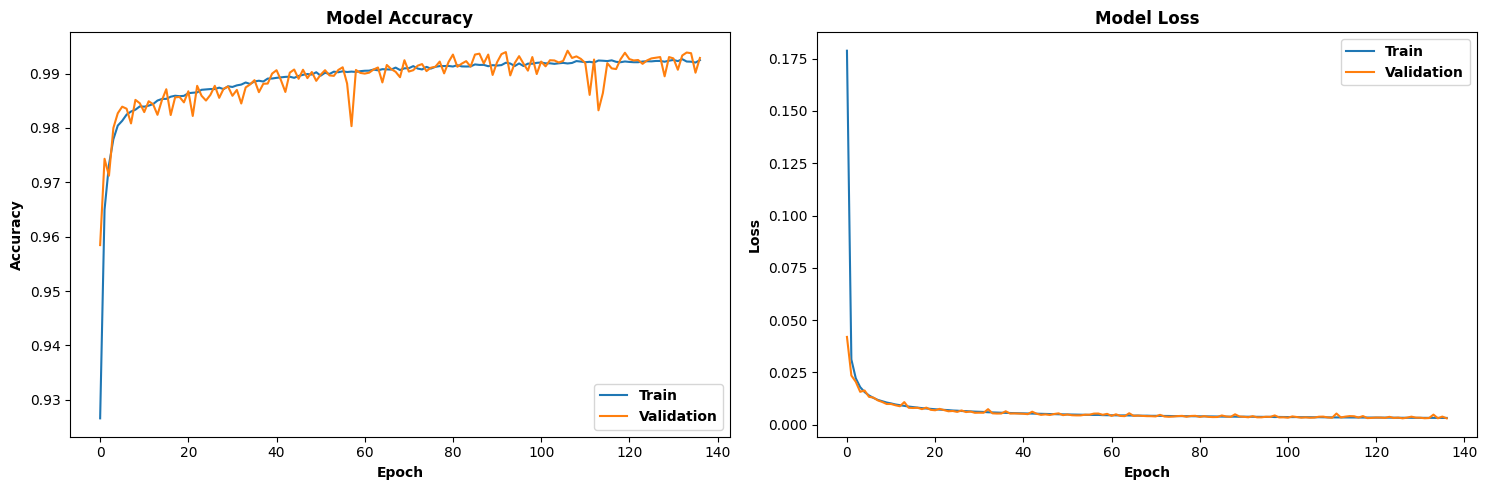

In [35]:
plot_training_history(history_ann_adagrad_Random)

In [36]:
ann_rmsprop_Random = ann(optimizer='rmsprop')
ann_rmsprop_Random.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 3)                 12        
                                                                 
 dense_17 (Dense)            (None, 100)               400       
                                                                 
 dense_18 (Dense)            (None, 100)               10100     
                                                                 
 dense_19 (Dense)            (None, 3)                 303       
                                                                 
Total params: 10815 (42.25 KB)
Trainable params: 10815 (42.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
history_ann_rmsprop_Random = ann_rmsprop_Random.fit(x_train_Random, y_train_Random, epochs = 200, validation_split = 0.2, callbacks=[early_stopping])

Epoch 1/200
3000/3000 [==============================] - 5s 1ms/step - loss: 0.2554 - accuracy: 0.9211 - val_loss: 0.0846 - val_accuracy: 0.9486
Epoch 2/200
3000/3000 [==============================] - 4s 1ms/step - loss: 0.0435 - accuracy: 0.9551 - val_loss: 0.0389 - val_accuracy: 0.9608
Epoch 3/200
3000/3000 [==============================] - 4s 1ms/step - loss: 0.0334 - accuracy: 0.9631 - val_loss: 0.0279 - val_accuracy: 0.9728
Epoch 4/200
3000/3000 [==============================] - 4s 1ms/step - loss: 0.0284 - accuracy: 0.9701 - val_loss: 0.0358 - val_accuracy: 0.9792
Epoch 5/200
3000/3000 [==============================] - 4s 1ms/step - loss: 0.0255 - accuracy: 0.9744 - val_loss: 0.0202 - val_accuracy: 0.9791
Epoch 6/200
3000/3000 [==============================] - 5s 2ms/step - loss: 0.0237 - accuracy: 0.9774 - val_loss: 0.0195 - val_accuracy: 0.9715
Epoch 7/200
3000/3000 [==============================] - 5s 2ms/step - loss: 0.0223 - accuracy: 0.9797 - val_loss: 0.0139 - val_ac

In [38]:
test_loss_ann_rmsprop_Random, test_acc_ann_rmsprop_Random = ann_rmsprop_Random.evaluate(x_test_Random, y_test_Random)
print('Testing the Model :')
print('Testing Loss :', test_loss_ann_rmsprop_Random)
print('Testing Accuracy :', test_acc_ann_rmsprop_Random)

938/938 [==============================] - 3s 3ms/step - loss: 0.0056 - accuracy: 0.9914
Testing the Model :
Testing Loss : 0.005649829749017954
Testing Accuracy : 0.9914000034332275


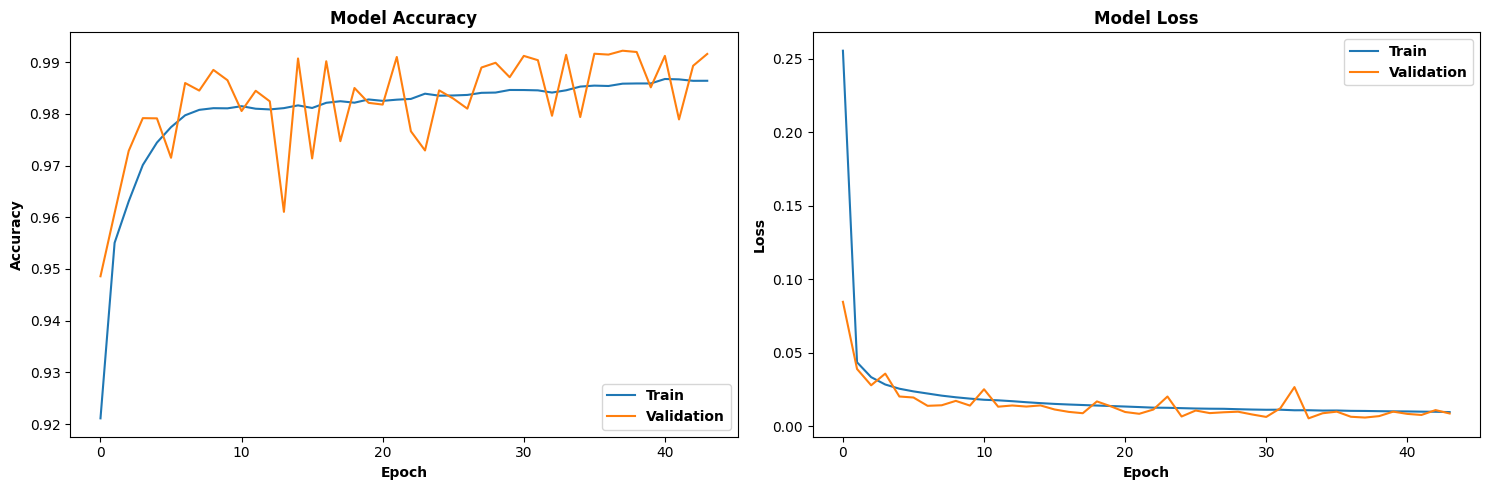

In [39]:
plot_training_history(history_ann_rmsprop_Random)

In [40]:
ann_sgd_Random = ann(optimizer='sgd')
ann_sgd_Random.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 3)                 12        
                                                                 
 dense_21 (Dense)            (None, 100)               400       
                                                                 
 dense_22 (Dense)            (None, 100)               10100     
                                                                 
 dense_23 (Dense)            (None, 3)                 303       
                                                                 
Total params: 10815 (42.25 KB)
Trainable params: 10815 (42.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [41]:
history_ann_sgd_Random = ann_sgd_Random.fit(x_train_Random, y_train_Random, epochs = 200, validation_split = 0.2, callbacks=[early_stopping])

Epoch 1/200
3000/3000 [==============================] - 13s 4ms/step - loss: 0.2689 - accuracy: 0.9095 - val_loss: 0.0741 - val_accuracy: 0.9178
Epoch 2/200
3000/3000 [==============================] - 11s 4ms/step - loss: 0.0641 - accuracy: 0.9332 - val_loss: 0.0613 - val_accuracy: 0.9448
Epoch 3/200
3000/3000 [==============================] - 11s 4ms/step - loss: 0.0485 - accuracy: 0.9470 - val_loss: 0.0454 - val_accuracy: 0.9551
Epoch 4/200
3000/3000 [==============================] - 11s 4ms/step - loss: 0.0414 - accuracy: 0.9571 - val_loss: 0.0364 - val_accuracy: 0.9621
Epoch 5/200
3000/3000 [==============================] - 11s 4ms/step - loss: 0.0361 - accuracy: 0.9631 - val_loss: 0.0292 - val_accuracy: 0.9674
Epoch 6/200
3000/3000 [==============================] - 12s 4ms/step - loss: 0.0325 - accuracy: 0.9670 - val_loss: 0.0341 - val_accuracy: 0.9668
Epoch 7/200
3000/3000 [==============================] - 11s 4ms/step - loss: 0.0301 - accuracy: 0.9697 - val_loss: 0.0273 -

In [42]:
test_loss_ann_sgd_Random, test_acc_ann_sgd_Random = ann_sgd_Random.evaluate(x_test_Random, y_test_Random)
print('Testing the Model :')
print('Testing Loss :', test_loss_ann_sgd_Random)
print('Testing Accuracy :', test_acc_ann_sgd_Random)

938/938 [==============================] - 3s 3ms/step - loss: 0.0112 - accuracy: 0.9801
Testing the Model :
Testing Loss : 0.011195785365998745
Testing Accuracy : 0.9801333546638489


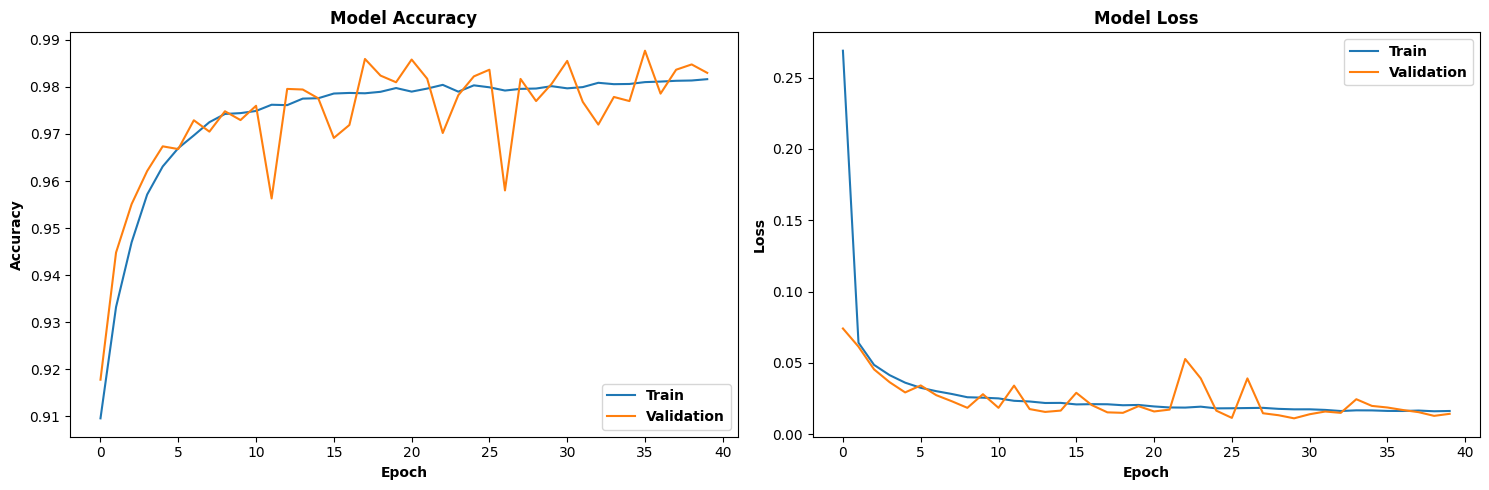

In [43]:
plot_training_history(history_ann_sgd_Random)

Fixed Step Size

In [44]:
data_Fixed = pd.read_csv('Three Link_Fixed Step Size.csv')

x_Fixed = data_Fixed.iloc[:, 0:3].values
y_Fixed = data_Fixed.iloc[:, 3:].values
x_train_Fixed, x_test_Fixed, y_train_Fixed, y_test_Fixed = train_test_split(x_Fixed, y_Fixed, test_size = 0.20)

In [45]:
ann_adam_Fixed = ann(optimizer='adam')
ann_adam_Fixed.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 3)                 12        
                                                                 
 dense_25 (Dense)            (None, 100)               400       
                                                                 
 dense_26 (Dense)            (None, 100)               10100     
                                                                 
 dense_27 (Dense)            (None, 3)                 303       
                                                                 
Total params: 10815 (42.25 KB)
Trainable params: 10815 (42.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [46]:
history_ann_adam_Fixed = ann_adam_Fixed.fit(x_train_Fixed, y_train_Fixed, epochs = 200, validation_split = 0.2, callbacks=[early_stopping])

Epoch 1/200
3000/3000 [==============================] - 15s 4ms/step - loss: 0.1649 - accuracy: 0.9308 - val_loss: 0.0450 - val_accuracy: 0.9639
Epoch 2/200
3000/3000 [==============================] - 12s 4ms/step - loss: 0.0381 - accuracy: 0.9617 - val_loss: 0.0297 - val_accuracy: 0.9675
Epoch 3/200
3000/3000 [==============================] - 12s 4ms/step - loss: 0.0297 - accuracy: 0.9650 - val_loss: 0.0313 - val_accuracy: 0.9594
Epoch 4/200
3000/3000 [==============================] - 12s 4ms/step - loss: 0.0263 - accuracy: 0.9696 - val_loss: 0.0311 - val_accuracy: 0.9589
Epoch 5/200
3000/3000 [==============================] - 12s 4ms/step - loss: 0.0240 - accuracy: 0.9730 - val_loss: 0.0262 - val_accuracy: 0.9779
Epoch 6/200
3000/3000 [==============================] - 12s 4ms/step - loss: 0.0226 - accuracy: 0.9737 - val_loss: 0.0280 - val_accuracy: 0.9735
Epoch 7/200
3000/3000 [==============================] - 12s 4ms/step - loss: 0.0220 - accuracy: 0.9747 - val_loss: 0.0181 -

In [47]:
test_loss_ann_adam_Fixed, test_acc_ann_adam_Fixed = ann_adam_Fixed.evaluate(x_test_Fixed, y_test_Fixed)
print('Testing the Model :')
print('Testing Loss :', test_loss_ann_adam_Fixed)
print('Testing Accuracy :', test_acc_ann_adam_Fixed)

938/938 [==============================] - 3s 3ms/step - loss: 0.0114 - accuracy: 0.9848
Testing the Model :
Testing Loss : 0.01141434907913208
Testing Accuracy : 0.9847666621208191


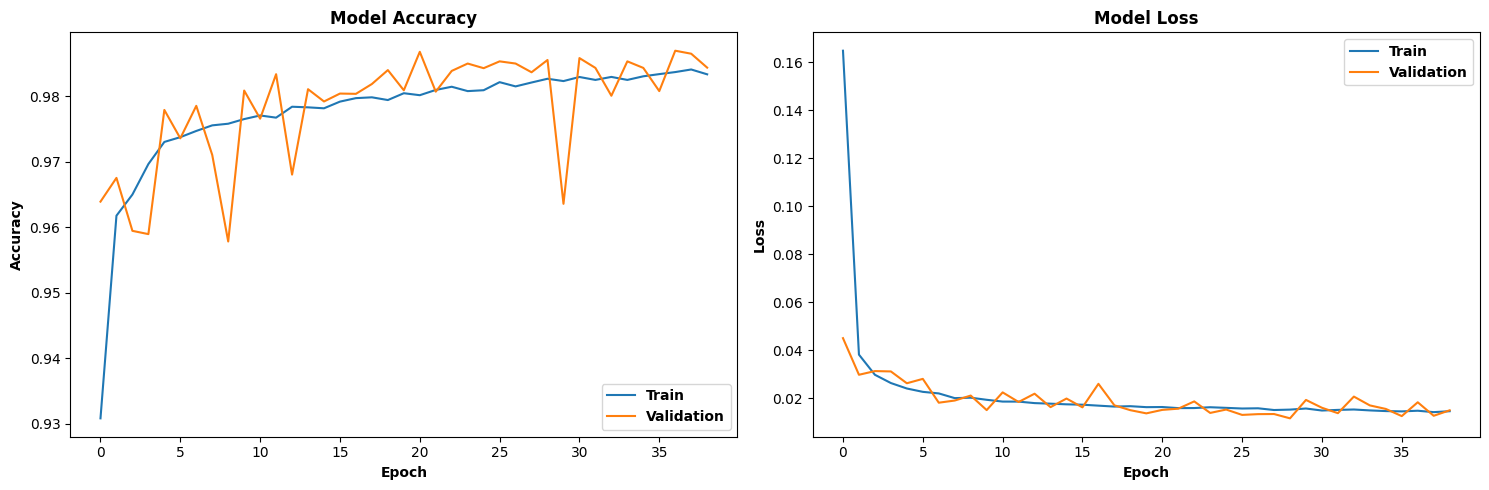

In [48]:
plot_training_history(history_ann_adam_Fixed)

In [49]:
ann_adamw_Fixed = ann(optimizer='adamw')
ann_adamw_Fixed.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 3)                 12        
                                                                 
 dense_29 (Dense)            (None, 100)               400       
                                                                 
 dense_30 (Dense)            (None, 100)               10100     
                                                                 
 dense_31 (Dense)            (None, 3)                 303       
                                                                 
Total params: 10815 (42.25 KB)
Trainable params: 10815 (42.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [50]:
history_ann_adamw_Fixed = ann_adamw_Fixed.fit(x_train_Fixed, y_train_Fixed, epochs = 200, validation_split = 0.2, callbacks=[early_stopping])

Epoch 1/200
3000/3000 [==============================] - 15s 4ms/step - loss: 0.3473 - accuracy: 0.9025 - val_loss: 0.0608 - val_accuracy: 0.9443
Epoch 2/200
3000/3000 [==============================] - 12s 4ms/step - loss: 0.0462 - accuracy: 0.9545 - val_loss: 0.0384 - val_accuracy: 0.9652
Epoch 3/200
3000/3000 [==============================] - 12s 4ms/step - loss: 0.0343 - accuracy: 0.9635 - val_loss: 0.0304 - val_accuracy: 0.9684
Epoch 4/200
3000/3000 [==============================] - 12s 4ms/step - loss: 0.0287 - accuracy: 0.9676 - val_loss: 0.0256 - val_accuracy: 0.9714
Epoch 5/200
3000/3000 [==============================] - 12s 4ms/step - loss: 0.0259 - accuracy: 0.9700 - val_loss: 0.0313 - val_accuracy: 0.9660
Epoch 6/200
3000/3000 [==============================] - 12s 4ms/step - loss: 0.0244 - accuracy: 0.9700 - val_loss: 0.0262 - val_accuracy: 0.9690
Epoch 7/200
3000/3000 [==============================] - 12s 4ms/step - loss: 0.0232 - accuracy: 0.9710 - val_loss: 0.0226 -

In [51]:
test_loss_ann_adamw_Fixed, test_acc_ann_adamw_Fixed = ann_adamw_Fixed.evaluate(x_test_Fixed, y_test_Fixed)
print('Testing the Model :')
print('Testing Loss :', test_loss_ann_adamw_Fixed)
print('Testing Accuracy :', test_acc_ann_adamw_Fixed)

938/938 [==============================] - 3s 3ms/step - loss: 0.0094 - accuracy: 0.9856
Testing the Model :
Testing Loss : 0.009397715330123901
Testing Accuracy : 0.9856333136558533


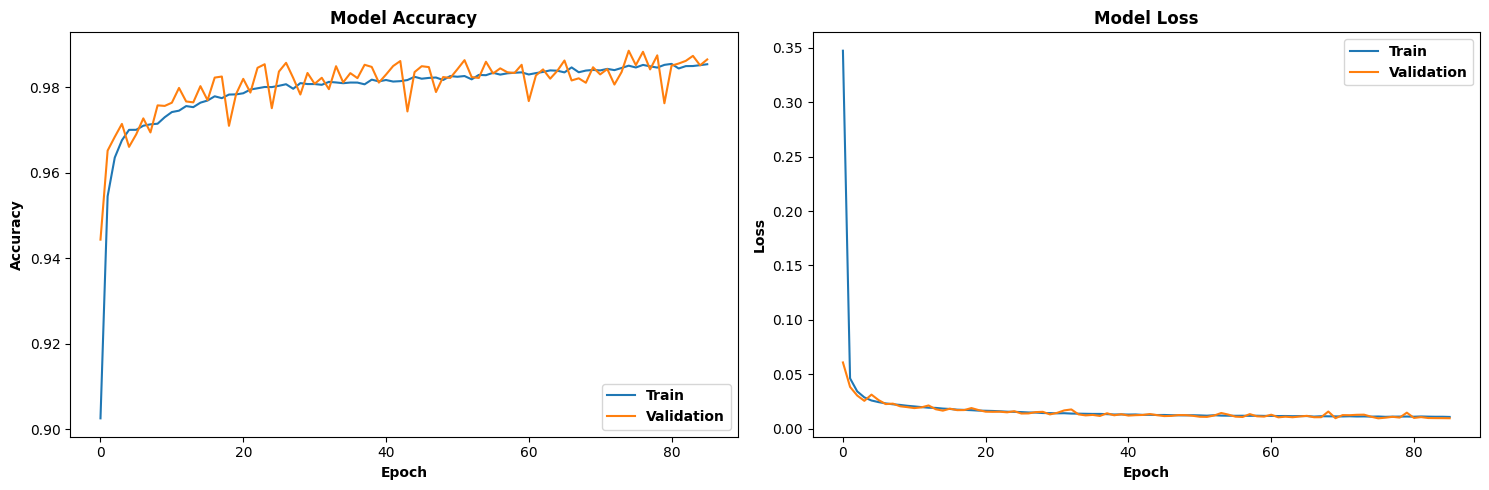

In [52]:
plot_training_history(history_ann_adamw_Fixed)

In [53]:
ann_adadelta_Fixed = ann(optimizer='adadelta')
ann_adadelta_Fixed.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 3)                 12        
                                                                 
 dense_33 (Dense)            (None, 100)               400       
                                                                 
 dense_34 (Dense)            (None, 100)               10100     
                                                                 
 dense_35 (Dense)            (None, 3)                 303       
                                                                 
Total params: 10815 (42.25 KB)
Trainable params: 10815 (42.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [54]:
history_ann_adadelta_Fixed = ann_adadelta_Fixed.fit(x_train_Fixed, y_train_Fixed, epochs = 200, validation_split = 0.2, callbacks=[early_stopping])

Epoch 1/200
3000/3000 [==============================] - 15s 4ms/step - loss: 0.2742 - accuracy: 0.9077 - val_loss: 0.0608 - val_accuracy: 0.9478
Epoch 2/200
3000/3000 [==============================] - 12s 4ms/step - loss: 0.0465 - accuracy: 0.9559 - val_loss: 0.0379 - val_accuracy: 0.9654
Epoch 3/200
3000/3000 [==============================] - 12s 4ms/step - loss: 0.0333 - accuracy: 0.9676 - val_loss: 0.0351 - val_accuracy: 0.9733
Epoch 4/200
3000/3000 [==============================] - 12s 4ms/step - loss: 0.0274 - accuracy: 0.9711 - val_loss: 0.0284 - val_accuracy: 0.9715
Epoch 5/200
3000/3000 [==============================] - 12s 4ms/step - loss: 0.0241 - accuracy: 0.9741 - val_loss: 0.0227 - val_accuracy: 0.9798
Epoch 6/200
3000/3000 [==============================] - 13s 4ms/step - loss: 0.0221 - accuracy: 0.9752 - val_loss: 0.0190 - val_accuracy: 0.9785
Epoch 7/200
3000/3000 [==============================] - 13s 4ms/step - loss: 0.0204 - accuracy: 0.9761 - val_loss: 0.0191 -

In [55]:
test_loss_ann_adadelta_Fixed, test_acc_ann_adadelta_Fixed = ann_adadelta_Fixed.evaluate(x_test_Fixed, y_test_Fixed)
print('Testing the Model :')
print('Testing Loss :', test_loss_ann_adadelta_Fixed)
print('Testing Accuracy :', test_acc_ann_adadelta_Fixed)

938/938 [==============================] - 3s 3ms/step - loss: 0.0093 - accuracy: 0.9876
Testing the Model :
Testing Loss : 0.009303409606218338
Testing Accuracy : 0.9876000285148621


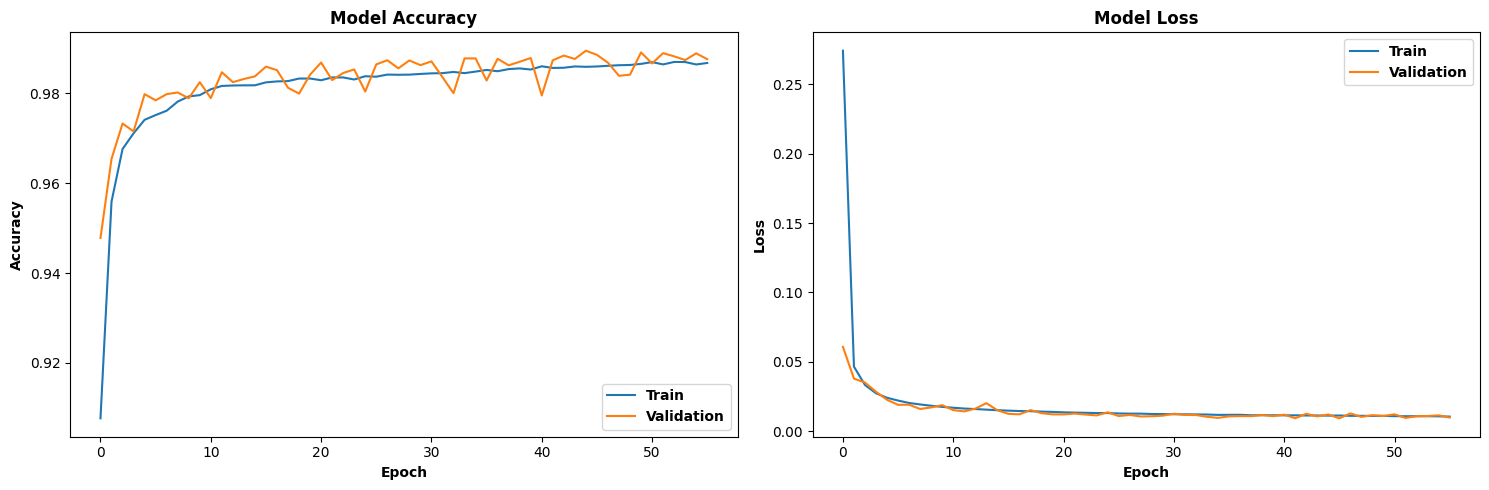

In [56]:
plot_training_history(history_ann_adadelta_Fixed)

In [57]:
ann_adagrad_Fixed = ann(optimizer='adagrad')
ann_adagrad_Fixed.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 3)                 12        
                                                                 
 dense_37 (Dense)            (None, 100)               400       
                                                                 
 dense_38 (Dense)            (None, 100)               10100     
                                                                 
 dense_39 (Dense)            (None, 3)                 303       
                                                                 
Total params: 10815 (42.25 KB)
Trainable params: 10815 (42.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [58]:
history_ann_adagrad_Fixed = ann_adagrad_Fixed.fit(x_train_Fixed, y_train_Fixed, epochs = 200, validation_split = 0.2, callbacks=[early_stopping])

Epoch 1/200
3000/3000 [==============================] - 13s 4ms/step - loss: 0.1583 - accuracy: 0.9280 - val_loss: 0.0454 - val_accuracy: 0.9578
Epoch 2/200
3000/3000 [==============================] - 12s 4ms/step - loss: 0.0361 - accuracy: 0.9659 - val_loss: 0.0287 - val_accuracy: 0.9733
Epoch 3/200
3000/3000 [==============================] - 12s 4ms/step - loss: 0.0261 - accuracy: 0.9744 - val_loss: 0.0231 - val_accuracy: 0.9780
Epoch 4/200
3000/3000 [==============================] - 12s 4ms/step - loss: 0.0219 - accuracy: 0.9773 - val_loss: 0.0192 - val_accuracy: 0.9801
Epoch 5/200
3000/3000 [==============================] - 12s 4ms/step - loss: 0.0195 - accuracy: 0.9793 - val_loss: 0.0208 - val_accuracy: 0.9807
Epoch 6/200
3000/3000 [==============================] - 12s 4ms/step - loss: 0.0179 - accuracy: 0.9802 - val_loss: 0.0169 - val_accuracy: 0.9793
Epoch 7/200
3000/3000 [==============================] - 12s 4ms/step - loss: 0.0167 - accuracy: 0.9818 - val_loss: 0.0161 -

In [59]:
test_loss_ann_adagrad_Fixed, test_acc_ann_adagrad_Fixed = ann_adagrad_Fixed.evaluate(x_test_Fixed, y_test_Fixed)
print('Testing the Model :')
print('Testing Loss :', test_loss_ann_adagrad_Fixed)
print('Testing Accuracy :', test_acc_ann_adagrad_Fixed)

938/938 [==============================] - 3s 3ms/step - loss: 0.0085 - accuracy: 0.9899
Testing the Model :
Testing Loss : 0.008525928482413292
Testing Accuracy : 0.9899333119392395


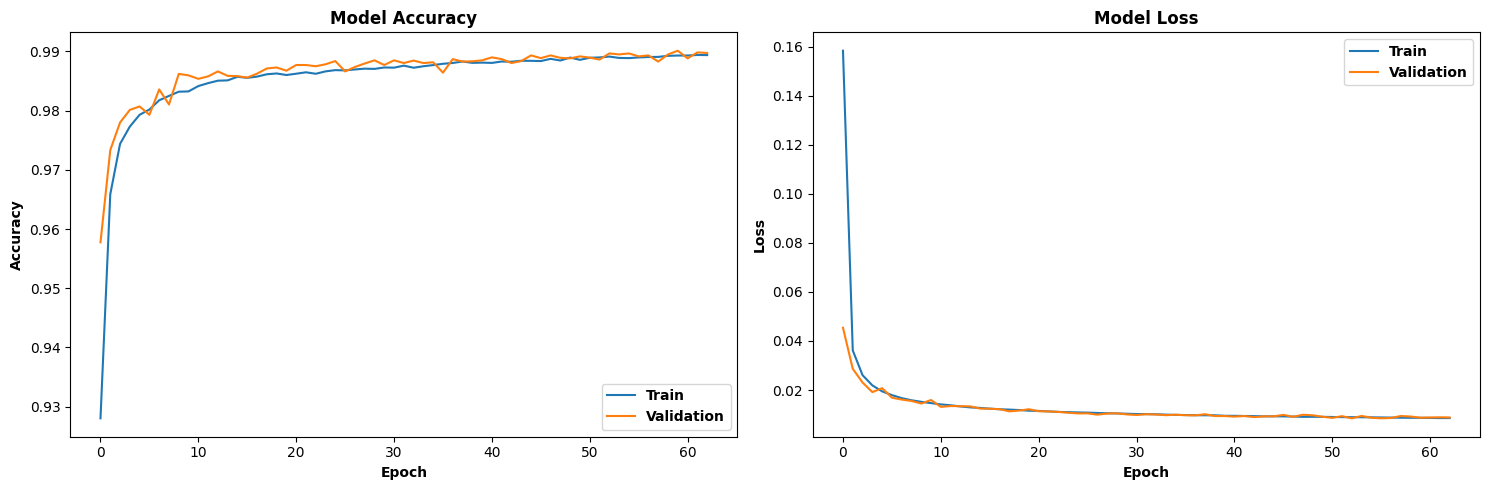

In [60]:
plot_training_history(history_ann_adagrad_Fixed)

In [61]:
ann_rmsprop_Fixed = ann(optimizer='rmsprop')
ann_rmsprop_Fixed.summary()

Model: "sequential_10"
_________________________________________________________________


 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 3)                 12        
                                                                 
 dense_41 (Dense)            (None, 100)               400       
                                                                 
 dense_42 (Dense)            (None, 100)               10100     
                                                                 
 dense_43 (Dense)            (None, 3)                 303       
                                                                 
Total params: 10815 (42.25 KB)
Trainable params: 10815 (42.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [62]:
history_ann_rmsprop_Fixed = ann_rmsprop_Fixed.fit(x_train_Fixed, y_train_Fixed, epochs = 200, validation_split = 0.2, callbacks=[early_stopping])

Epoch 1/200
3000/3000 [==============================] - 14s 4ms/step - loss: 0.2041 - accuracy: 0.9212 - val_loss: 0.0558 - val_accuracy: 0.9550
Epoch 2/200
3000/3000 [==============================] - 12s 4ms/step - loss: 0.0425 - accuracy: 0.9644 - val_loss: 0.0369 - val_accuracy: 0.9689
Epoch 3/200
3000/3000 [==============================] - 12s 4ms/step - loss: 0.0336 - accuracy: 0.9705 - val_loss: 0.0302 - val_accuracy: 0.9763
Epoch 4/200
3000/3000 [==============================] - 10s 3ms/step - loss: 0.0296 - accuracy: 0.9722 - val_loss: 0.0263 - val_accuracy: 0.9724
Epoch 5/200
3000/3000 [==============================] - 6s 2ms/step - loss: 0.0272 - accuracy: 0.9741 - val_loss: 0.0213 - val_accuracy: 0.9788
Epoch 6/200
3000/3000 [==============================] - 12s 4ms/step - loss: 0.0258 - accuracy: 0.9751 - val_loss: 0.0238 - val_accuracy: 0.9810
Epoch 7/200
3000/3000 [==============================] - 12s 4ms/step - loss: 0.0245 - accuracy: 0.9766 - val_loss: 0.0268 - 

In [63]:
test_loss_ann_rmsprop_Fixed, test_acc_ann_rmsprop_Fixed = ann_rmsprop_Fixed.evaluate(x_test_Fixed, y_test_Fixed)
print('Testing the Model :')
print('Testing Loss :', test_loss_ann_rmsprop_Fixed)
print('Testing Accuracy :', test_acc_ann_rmsprop_Fixed)

938/938 [==============================] - 3s 3ms/step - loss: 0.0121 - accuracy: 0.9875
Testing the Model :
Testing Loss : 0.012067713774740696
Testing Accuracy : 0.987500011920929


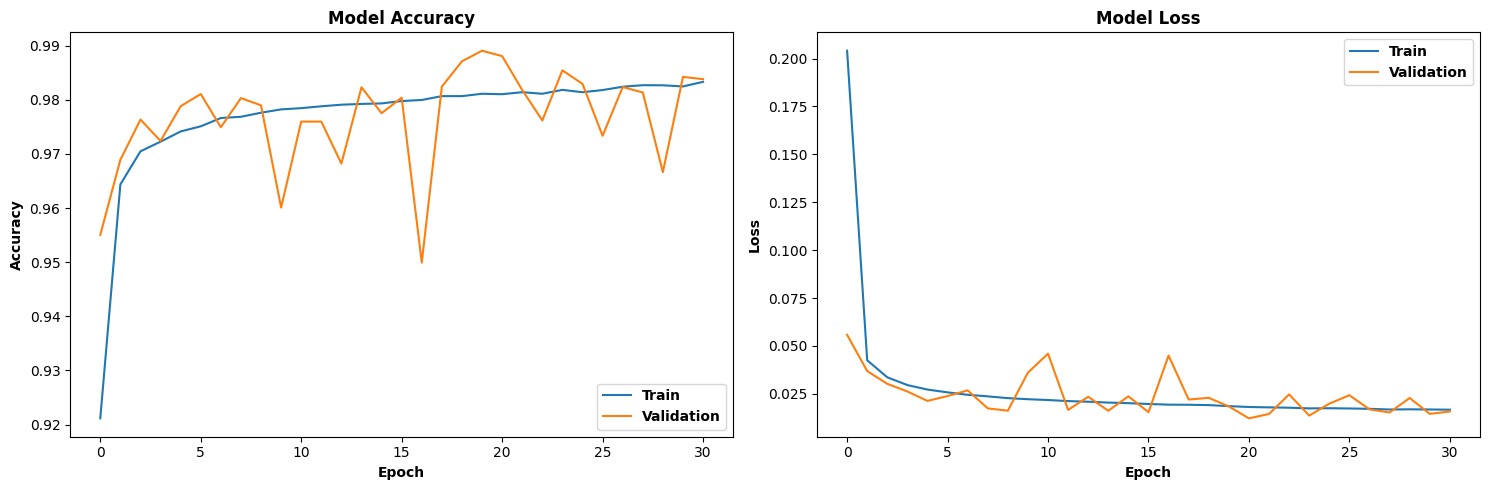

In [64]:
plot_training_history(history_ann_rmsprop_Fixed)

In [65]:
ann_sgd_Fixed = ann(optimizer='sgd')
ann_sgd_Fixed.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 3)                 12        
                                                                 
 dense_45 (Dense)            (None, 100)               400       
                                                                 
 dense_46 (Dense)            (None, 100)               10100     
                                                                 
 dense_47 (Dense)            (None, 3)                 303       
                                                                 
Total params: 10815 (42.25 KB)
Trainable params: 10815 (42.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [66]:
history_ann_sgd_Fixed = ann_sgd_Fixed.fit(x_train_Fixed, y_train_Fixed, epochs = 200, validation_split = 0.2, callbacks=[early_stopping])

Epoch 1/200
3000/3000 [==============================] - 13s 4ms/step - loss: 0.2816 - accuracy: 0.9021 - val_loss: 0.0970 - val_accuracy: 0.9172
Epoch 2/200
3000/3000 [==============================] - 12s 4ms/step - loss: 0.0667 - accuracy: 0.9402 - val_loss: 0.0560 - val_accuracy: 0.9513
Epoch 3/200
3000/3000 [==============================] - 9s 3ms/step - loss: 0.0536 - accuracy: 0.9531 - val_loss: 0.0568 - val_accuracy: 0.9597
Epoch 4/200
3000/3000 [==============================] - 4s 1ms/step - loss: 0.0470 - accuracy: 0.9627 - val_loss: 0.0528 - val_accuracy: 0.9647
Epoch 5/200
3000/3000 [==============================] - 4s 1ms/step - loss: 0.0404 - accuracy: 0.9691 - val_loss: 0.0323 - val_accuracy: 0.9669
Epoch 6/200
3000/3000 [==============================] - 4s 1ms/step - loss: 0.0372 - accuracy: 0.9706 - val_loss: 0.0296 - val_accuracy: 0.9724
Epoch 7/200
3000/3000 [==============================] - 4s 1ms/step - loss: 0.0354 - accuracy: 0.9726 - val_loss: 0.0363 - val_

In [67]:
test_loss_ann_sgd_Fixed, test_acc_ann_sgd_Fixed = ann_sgd_Fixed.evaluate(x_test_Fixed, y_test_Fixed)
print('Testing the Model :')
print('Testing Loss :', test_loss_ann_sgd_Fixed)
print('Testing Accuracy :', test_acc_ann_sgd_Fixed)

938/938 [==============================] - 3s 3ms/step - loss: 0.0209 - accuracy: 0.9776
Testing the Model :
Testing Loss : 0.020914580672979355
Testing Accuracy : 0.9775999784469604


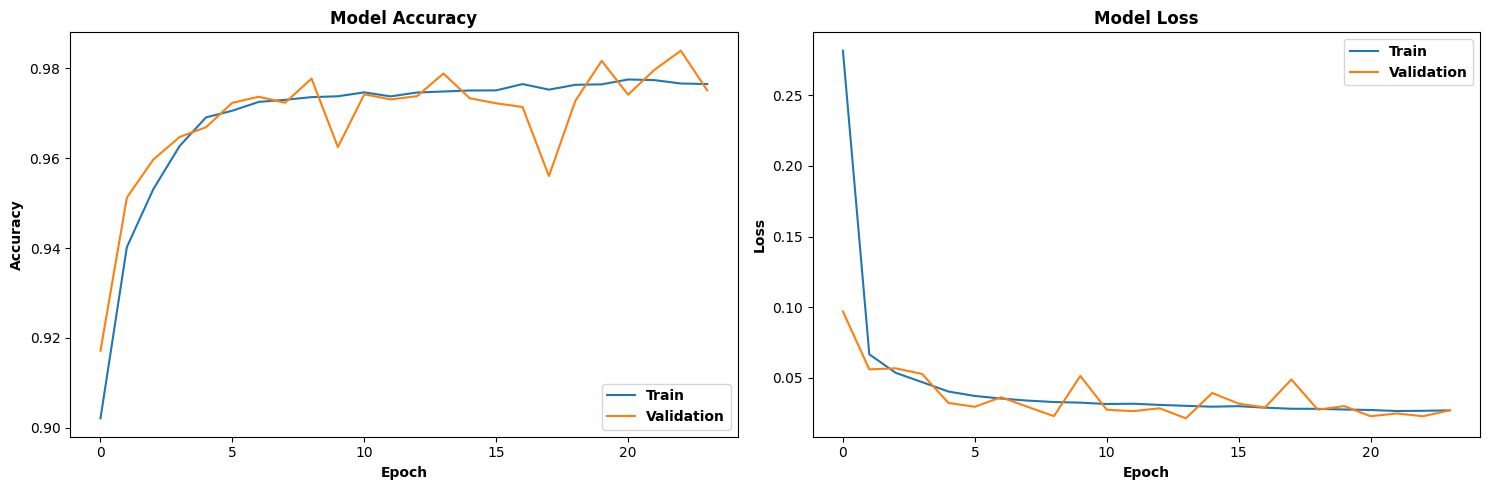

In [68]:
plot_training_history(history_ann_sgd_Fixed)

Sinusoidal Trajectory

In [69]:
data_Sinusoidal = pd.read_csv('Three Link_Sinusoidal Trajectory.csv')

x_Sinusoidal = data_Sinusoidal.iloc[:, 0:3].values
y_Sinusoidal = data_Sinusoidal.iloc[:, 3:].values
x_train_Sinusoidal, x_test_Sinusoidal, y_train_Sinusoidal, y_test_Sinusoidal = train_test_split(x_Sinusoidal, y_Sinusoidal, test_size = 0.20)

In [70]:
ann_adam_Sinusoidal = ann(optimizer='adam')
ann_adam_Sinusoidal.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 3)                 12        
                                                                 
 dense_49 (Dense)            (None, 100)               400       
                                                                 
 dense_50 (Dense)            (None, 100)               10100     
                                                                 
 dense_51 (Dense)            (None, 3)                 303       
                                                                 
Total params: 10815 (42.25 KB)
Trainable params: 10815 (42.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [71]:
history_ann_adam_Sinusoidal = ann_adam_Sinusoidal.fit(x_train_Sinusoidal, y_train_Sinusoidal, epochs = 200, validation_split = 0.2, callbacks=[early_stopping])

Epoch 1/200
3000/3000 [==============================] - 16s 4ms/step - loss: 0.1146 - accuracy: 0.9008 - val_loss: 0.0444 - val_accuracy: 0.9244
Epoch 2/200
3000/3000 [==============================] - 12s 4ms/step - loss: 0.0364 - accuracy: 0.9331 - val_loss: 0.0347 - val_accuracy: 0.9415
Epoch 3/200
3000/3000 [==============================] - 12s 4ms/step - loss: 0.0314 - accuracy: 0.9373 - val_loss: 0.0325 - val_accuracy: 0.9361
Epoch 4/200
3000/3000 [==============================] - 12s 4ms/step - loss: 0.0282 - accuracy: 0.9407 - val_loss: 0.0269 - val_accuracy: 0.9379
Epoch 5/200
3000/3000 [==============================] - 12s 4ms/step - loss: 0.0268 - accuracy: 0.9420 - val_loss: 0.0224 - val_accuracy: 0.9454
Epoch 6/200
3000/3000 [==============================] - 12s 4ms/step - loss: 0.0249 - accuracy: 0.9445 - val_loss: 0.0206 - val_accuracy: 0.9564
Epoch 7/200
3000/3000 [==============================] - 12s 4ms/step - loss: 0.0237 - accuracy: 0.9446 - val_loss: 0.0293 -

In [72]:
test_loss_ann_adam_Sinusoidal, test_acc_ann_adam_Sinusoidal = ann_adam_Sinusoidal.evaluate(x_test_Sinusoidal, y_test_Sinusoidal)
print('Testing the Model :')
print('Testing Loss :', test_loss_ann_adam_Sinusoidal)
print('Testing Accuracy :', test_acc_ann_adam_Sinusoidal)

938/938 [==============================] - 3s 3ms/step - loss: 0.0150 - accuracy: 0.9647
Testing the Model :
Testing Loss : 0.01504362653940916
Testing Accuracy : 0.9646999835968018


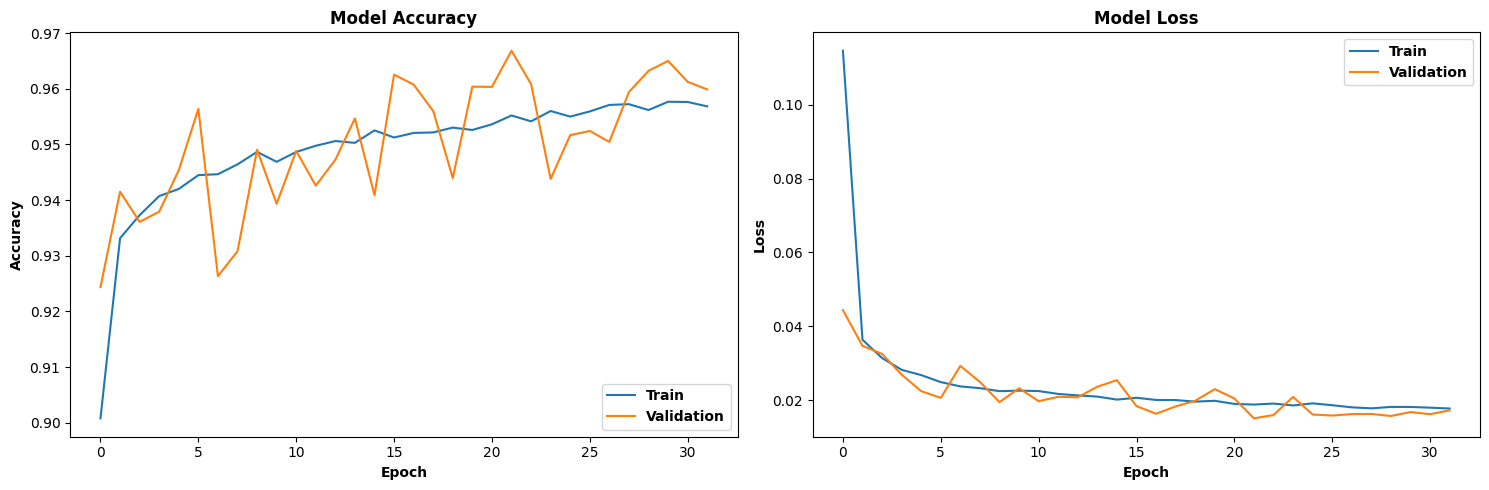

In [73]:
plot_training_history(history_ann_adam_Sinusoidal)

In [74]:
ann_adamw_Sinusoidal = ann(optimizer='adamw')
ann_adamw_Sinusoidal.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_52 (Dense)            (None, 3)                 12        
                                                                 
 dense_53 (Dense)            (None, 100)               400       
                                                                 
 dense_54 (Dense)            (None, 100)               10100     
                                                                 
 dense_55 (Dense)            (None, 3)                 303       
                                                                 
Total params: 10815 (42.25 KB)
Trainable params: 10815 (42.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [75]:
history_ann_adamw_Sinusoidal = ann_adamw_Sinusoidal.fit(x_train_Sinusoidal, y_train_Sinusoidal, epochs = 200, validation_split = 0.2, callbacks=[early_stopping])

Epoch 1/200
3000/3000 [==============================] - 15s 4ms/step - loss: 0.2252 - accuracy: 0.8573 - val_loss: 0.0564 - val_accuracy: 0.8959
Epoch 2/200
3000/3000 [==============================] - 12s 4ms/step - loss: 0.0424 - accuracy: 0.9230 - val_loss: 0.0436 - val_accuracy: 0.9103
Epoch 3/200
3000/3000 [==============================] - 12s 4ms/step - loss: 0.0332 - accuracy: 0.9342 - val_loss: 0.0315 - val_accuracy: 0.9281
Epoch 4/200
3000/3000 [==============================] - 13s 4ms/step - loss: 0.0299 - accuracy: 0.9372 - val_loss: 0.0308 - val_accuracy: 0.9347
Epoch 5/200
3000/3000 [==============================] - 5s 2ms/step - loss: 0.0272 - accuracy: 0.9395 - val_loss: 0.0283 - val_accuracy: 0.9383
Epoch 6/200
3000/3000 [==============================] - 5s 2ms/step - loss: 0.0254 - accuracy: 0.9429 - val_loss: 0.0237 - val_accuracy: 0.9391
Epoch 7/200
3000/3000 [==============================] - 5s 2ms/step - loss: 0.0238 - accuracy: 0.9457 - val_loss: 0.0237 - va

In [76]:
test_loss_ann_adamw_Sinusoidal, test_acc_ann_adamw_Sinusoidal = ann_adamw_Sinusoidal.evaluate(x_test_Sinusoidal, y_test_Sinusoidal)
print('Testing the Model :')
print('Testing Loss :', test_loss_ann_adamw_Sinusoidal)
print('Testing Accuracy :', test_acc_ann_adamw_Sinusoidal)

938/938 [==============================] - 3s 3ms/step - loss: 0.0141 - accuracy: 0.9592
Testing the Model :
Testing Loss : 0.014096087776124477
Testing Accuracy : 0.9592333436012268


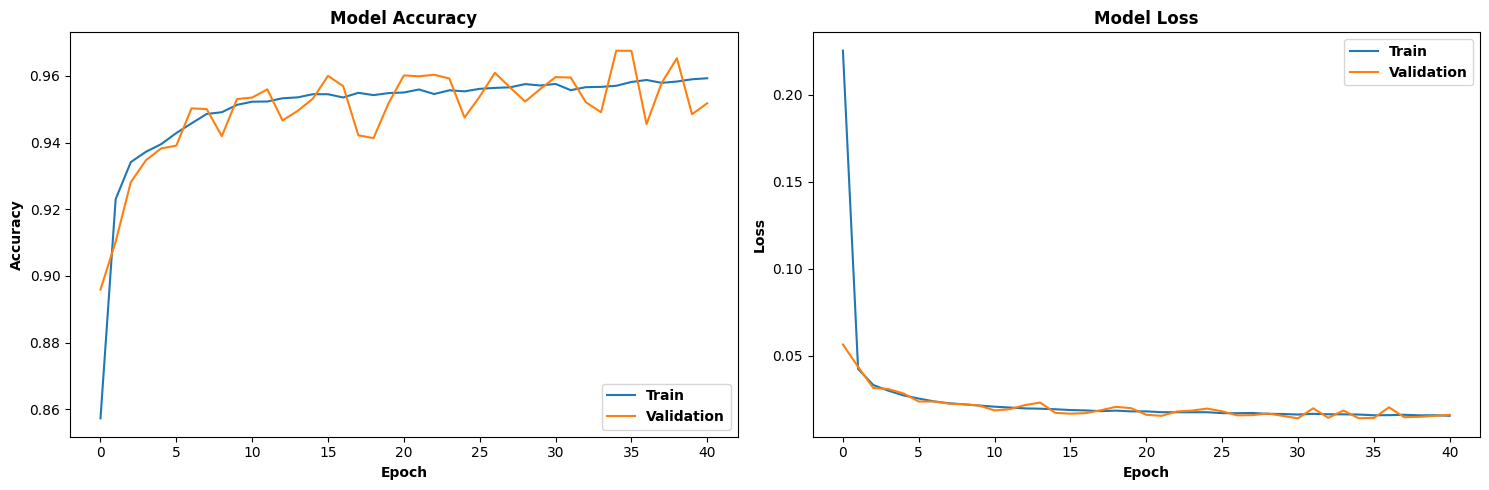

In [77]:
plot_training_history(history_ann_adamw_Sinusoidal)

In [78]:
ann_adadelta_Sinusoidal = ann(optimizer='adadelta')
ann_adadelta_Sinusoidal.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_56 (Dense)            (None, 3)                 12        
                                                                 
 dense_57 (Dense)            (None, 100)               400       
                                                                 
 dense_58 (Dense)            (None, 100)               10100     
                                                                 
 dense_59 (Dense)            (None, 3)                 303       
                                                                 
Total params: 10815 (42.25 KB)
Trainable params: 10815 (42.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [79]:
history_ann_adadelta_Sinusoidal = ann_adadelta_Sinusoidal.fit(x_train_Sinusoidal, y_train_Sinusoidal, epochs = 200, validation_split = 0.2, callbacks=[early_stopping])

Epoch 1/200
3000/3000 [==============================] - 15s 4ms/step - loss: 0.1785 - accuracy: 0.8764 - val_loss: 0.0462 - val_accuracy: 0.9180
Epoch 2/200
3000/3000 [==============================] - 12s 4ms/step - loss: 0.0398 - accuracy: 0.9323 - val_loss: 0.0334 - val_accuracy: 0.9404
Epoch 3/200
3000/3000 [==============================] - 7s 2ms/step - loss: 0.0328 - accuracy: 0.9401 - val_loss: 0.0320 - val_accuracy: 0.9443
Epoch 4/200
3000/3000 [==============================] - 5s 2ms/step - loss: 0.0288 - accuracy: 0.9456 - val_loss: 0.0261 - val_accuracy: 0.9478
Epoch 5/200
3000/3000 [==============================] - 4s 1ms/step - loss: 0.0263 - accuracy: 0.9491 - val_loss: 0.0226 - val_accuracy: 0.9551
Epoch 6/200
3000/3000 [==============================] - 4s 1ms/step - loss: 0.0244 - accuracy: 0.9509 - val_loss: 0.0244 - val_accuracy: 0.9471
Epoch 7/200
3000/3000 [==============================] - 8s 3ms/step - loss: 0.0235 - accuracy: 0.9522 - val_loss: 0.0214 - val_

In [80]:
test_loss_ann_adadelta_Sinusoidal, test_acc_ann_adadelta_Sinusoidal = ann_adadelta_Sinusoidal.evaluate(x_test_Sinusoidal, y_test_Sinusoidal)
print('Testing the Model :')
print('Testing Loss :', test_loss_ann_adadelta_Sinusoidal)
print('Testing Accuracy :', test_acc_ann_adadelta_Sinusoidal)

938/938 [==============================] - 2s 2ms/step - loss: 0.0106 - accuracy: 0.9690
Testing the Model :
Testing Loss : 0.01062923762947321
Testing Accuracy : 0.9689666628837585


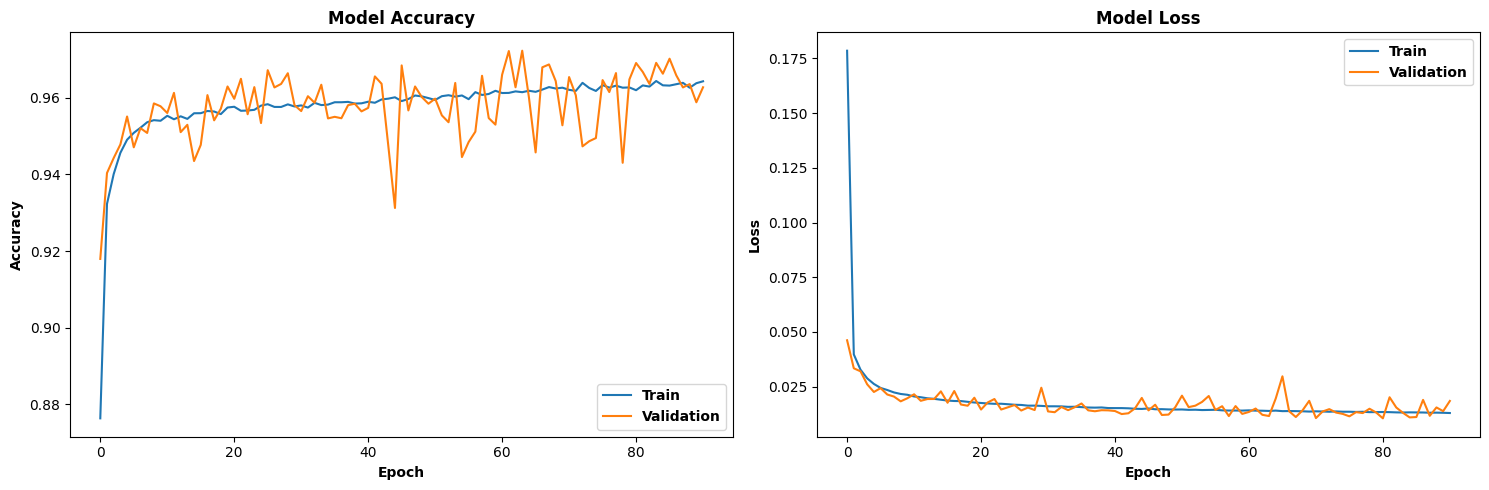

In [81]:
plot_training_history(history_ann_adadelta_Sinusoidal)

In [82]:
ann_adagrad_Sinusoidal = ann(optimizer='adagrad')
ann_adagrad_Sinusoidal.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 3)                 12        
                                                                 
 dense_61 (Dense)            (None, 100)               400       
                                                                 
 dense_62 (Dense)            (None, 100)               10100     
                                                                 
 dense_63 (Dense)            (None, 3)                 303       
                                                                 
Total params: 10815 (42.25 KB)
Trainable params: 10815 (42.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [83]:
history_ann_adagrad_Sinusoidal = ann_adagrad_Sinusoidal.fit(x_train_Sinusoidal, y_train_Sinusoidal, epochs = 200, validation_split = 0.2, callbacks=[early_stopping])

Epoch 1/200
3000/3000 [==============================] - 14s 4ms/step - loss: 0.1667 - accuracy: 0.8748 - val_loss: 0.0482 - val_accuracy: 0.9230
Epoch 2/200
3000/3000 [==============================] - 11s 4ms/step - loss: 0.0429 - accuracy: 0.9384 - val_loss: 0.0356 - val_accuracy: 0.9466
Epoch 3/200
3000/3000 [==============================] - 12s 4ms/step - loss: 0.0347 - accuracy: 0.9491 - val_loss: 0.0335 - val_accuracy: 0.9520
Epoch 4/200
3000/3000 [==============================] - 11s 4ms/step - loss: 0.0307 - accuracy: 0.9521 - val_loss: 0.0274 - val_accuracy: 0.9594
Epoch 5/200
3000/3000 [==============================] - 11s 4ms/step - loss: 0.0279 - accuracy: 0.9550 - val_loss: 0.0289 - val_accuracy: 0.9591
Epoch 6/200
3000/3000 [==============================] - 12s 4ms/step - loss: 0.0258 - accuracy: 0.9582 - val_loss: 0.0280 - val_accuracy: 0.9568
Epoch 7/200
3000/3000 [==============================] - 12s 4ms/step - loss: 0.0240 - accuracy: 0.9609 - val_loss: 0.0222 -

In [84]:
test_loss_ann_adagrad_Sinusoidal, test_acc_ann_adagrad_Sinusoidal = ann_adagrad_Sinusoidal.evaluate(x_test_Sinusoidal, y_test_Sinusoidal)
print('Testing the Model :')
print('Testing Loss :', test_loss_ann_adagrad_Sinusoidal)
print('Testing Accuracy :', test_acc_ann_adagrad_Sinusoidal)

  1/938 [..............................] - ETA: 2:24 - loss: 0.0097 - accuracy: 0.9688

938/938 [==============================] - 2s 2ms/step - loss: 0.0090 - accuracy: 0.9749
Testing the Model :
Testing Loss : 0.008950109593570232
Testing Accuracy : 0.9749333262443542


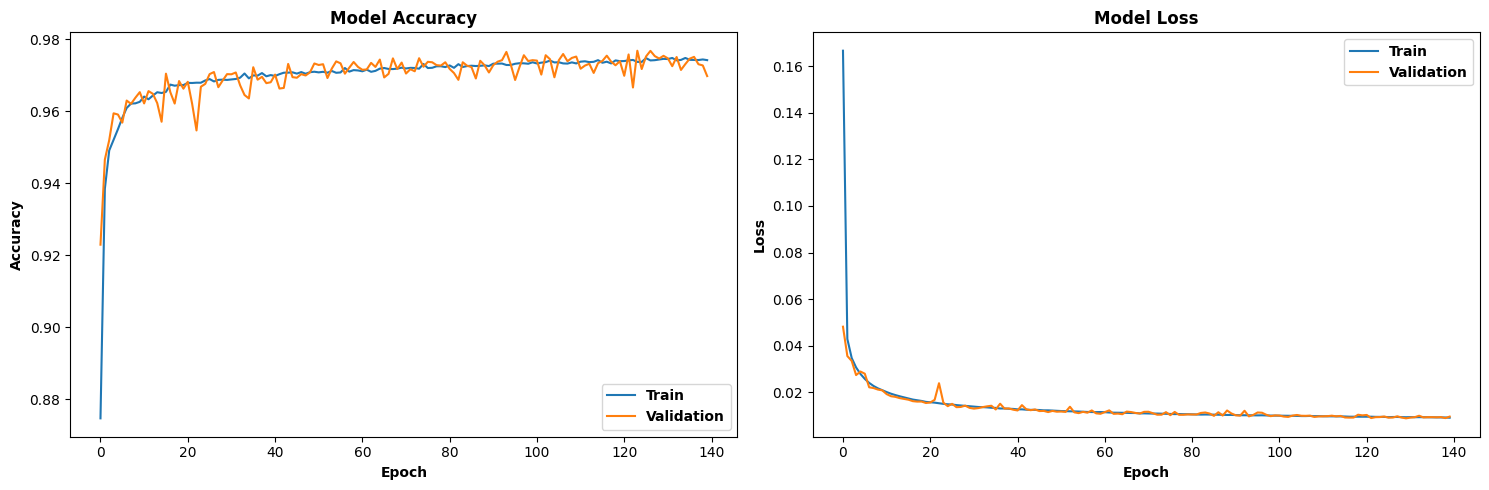

In [85]:
plot_training_history(history_ann_adagrad_Sinusoidal)

In [86]:
ann_rmsprop_Sinusoidal = ann(optimizer='rmsprop')
ann_rmsprop_Sinusoidal.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_64 (Dense)            (None, 3)                 12        
                                                                 
 dense_65 (Dense)            (None, 100)               400       
                                                                 
 dense_66 (Dense)            (None, 100)               10100     
                                                                 
 dense_67 (Dense)            (None, 3)                 303       
                                                                 
Total params: 10815 (42.25 KB)
Trainable params: 10815 (42.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [87]:
history_ann_rmsprop_Sinusoidal = ann_rmsprop_Sinusoidal.fit(x_train_Sinusoidal, y_train_Sinusoidal, epochs = 200, validation_split = 0.2, callbacks=[early_stopping])

Epoch 1/200
3000/3000 [==============================] - 7s 2ms/step - loss: 0.1874 - accuracy: 0.8712 - val_loss: 0.0480 - val_accuracy: 0.9264
Epoch 2/200
3000/3000 [==============================] - 4s 1ms/step - loss: 0.0438 - accuracy: 0.9291 - val_loss: 0.0328 - val_accuracy: 0.9400
Epoch 3/200
3000/3000 [==============================] - 3s 978us/step - loss: 0.0380 - accuracy: 0.9333 - val_loss: 0.0301 - val_accuracy: 0.9450
Epoch 4/200
3000/3000 [==============================] - 3s 948us/step - loss: 0.0350 - accuracy: 0.9384 - val_loss: 0.0327 - val_accuracy: 0.9451
Epoch 5/200
3000/3000 [==============================] - 3s 1000us/step - loss: 0.0328 - accuracy: 0.9414 - val_loss: 0.0242 - val_accuracy: 0.9515
Epoch 6/200
3000/3000 [==============================] - 3s 1ms/step - loss: 0.0309 - accuracy: 0.9425 - val_loss: 0.0261 - val_accuracy: 0.9504
Epoch 7/200
3000/3000 [==============================] - 3s 984us/step - loss: 0.0296 - accuracy: 0.9447 - val_loss: 0.0418

In [88]:
test_loss_ann_rmsprop_Sinusoidal, test_acc_ann_rmsprop_Sinusoidal = ann_rmsprop_Sinusoidal.evaluate(x_test_Sinusoidal, y_test_Sinusoidal)
print('Testing the Model :')
print('Testing Loss :', test_loss_ann_rmsprop_Sinusoidal)
print('Testing Accuracy :', test_acc_ann_rmsprop_Sinusoidal)

938/938 [==============================] - 2s 2ms/step - loss: 0.0147 - accuracy: 0.9645
Testing the Model :
Testing Loss : 0.014666217379271984
Testing Accuracy : 0.9644666910171509


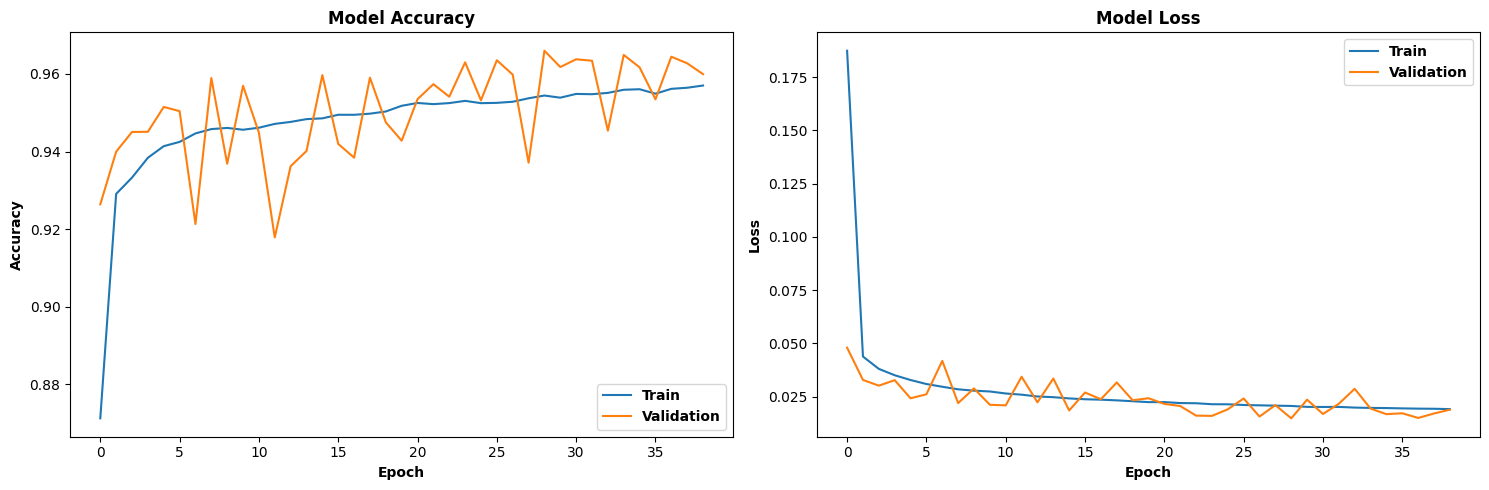

In [89]:
plot_training_history(history_ann_rmsprop_Sinusoidal)

In [90]:
ann_sgd_Sinusoidal = ann(optimizer='sgd')
ann_sgd_Sinusoidal.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_68 (Dense)            (None, 3)                 12        
                                                                 
 dense_69 (Dense)            (None, 100)               400       
                                                                 
 dense_70 (Dense)            (None, 100)               10100     
                                                                 
 dense_71 (Dense)            (None, 3)                 303       
                                                                 
Total params: 10815 (42.25 KB)
Trainable params: 10815 (42.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [91]:
history_ann_sgd_Sinusoidal = ann_sgd_Sinusoidal.fit(x_train_Sinusoidal, y_train_Sinusoidal, epochs = 200, validation_split = 0.2, callbacks=[early_stopping])

Epoch 1/200
3000/3000 [==============================] - 9s 3ms/step - loss: 0.2916 - accuracy: 0.8318 - val_loss: 0.0644 - val_accuracy: 0.9114
Epoch 2/200
3000/3000 [==============================] - 6s 2ms/step - loss: 0.0625 - accuracy: 0.9087 - val_loss: 0.0560 - val_accuracy: 0.9112
Epoch 3/200
3000/3000 [==============================] - 8s 3ms/step - loss: 0.0540 - accuracy: 0.9226 - val_loss: 0.0619 - val_accuracy: 0.9280
Epoch 4/200
3000/3000 [==============================] - 9s 3ms/step - loss: 0.0490 - accuracy: 0.9306 - val_loss: 0.0475 - val_accuracy: 0.9105
Epoch 5/200
3000/3000 [==============================] - 9s 3ms/step - loss: 0.0461 - accuracy: 0.9329 - val_loss: 0.0592 - val_accuracy: 0.9164
Epoch 6/200
3000/3000 [==============================] - 7s 2ms/step - loss: 0.0448 - accuracy: 0.9334 - val_loss: 0.0471 - val_accuracy: 0.9155
Epoch 7/200
3000/3000 [==============================] - 8s 3ms/step - loss: 0.0425 - accuracy: 0.9362 - val_loss: 0.0389 - val_ac

In [92]:
test_loss_ann_sgd_Sinusoidal, test_acc_ann_sgd_Sinusoidal = ann_sgd_Sinusoidal.evaluate(x_test_Sinusoidal, y_test_Sinusoidal)
print('Testing the Model :')
print('Testing Loss :', test_loss_ann_sgd_Sinusoidal)
print('Testing Accuracy :', test_acc_ann_sgd_Sinusoidal)

938/938 [==============================] - 1s 1ms/step - loss: 0.0265 - accuracy: 0.9474
Testing the Model :
Testing Loss : 0.02652638405561447
Testing Accuracy : 0.9473999738693237


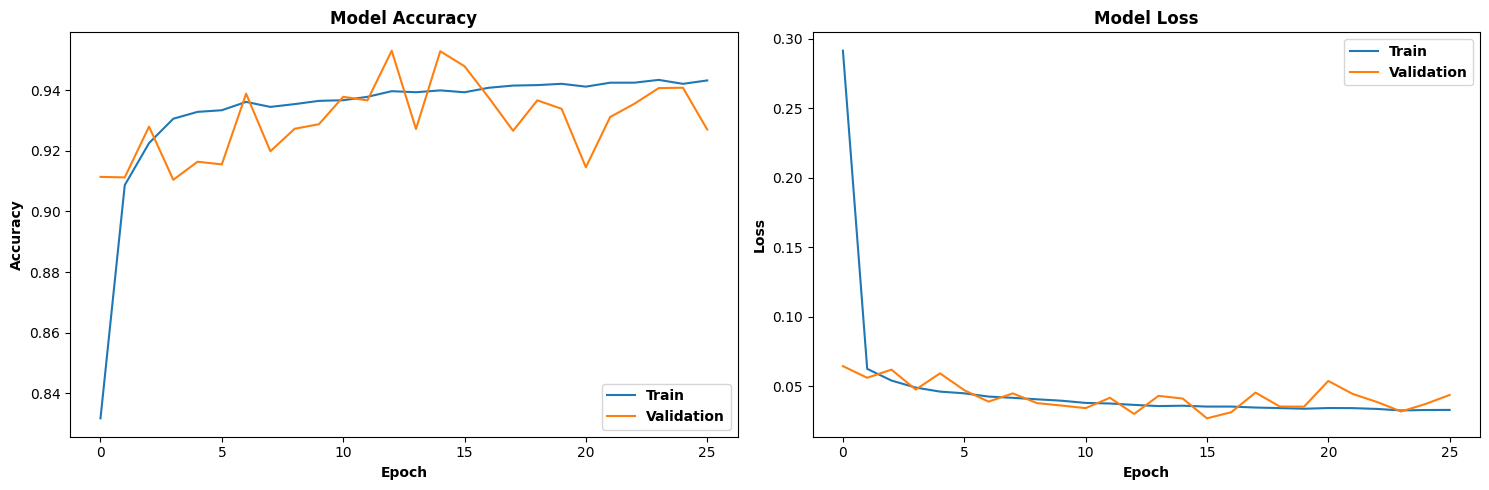

In [93]:
plot_training_history(history_ann_sgd_Sinusoidal)

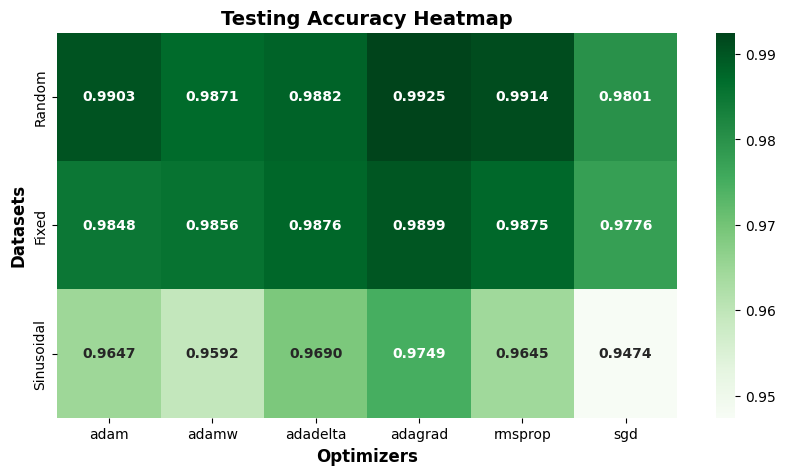

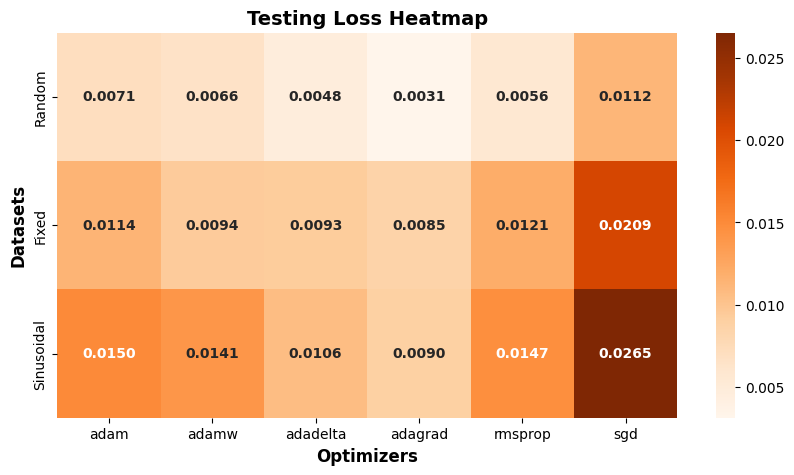

In [94]:
datasets = ["Random", "Fixed", "Sinusoidal"]
optimizers = ["adam", "adamw", "adadelta", "adagrad", "rmsprop", "sgd"]

accuracy_matrix = np.array([[globals()[f"test_acc_ann_{opt}_{ds}"] for opt in optimizers] for ds in datasets])
loss_matrix = np.array([[globals()[f"test_loss_ann_{opt}_{ds}"] for opt in optimizers] for ds in datasets])

def plot_heatmap(matrix, title, cmap, xlabel, ylabel, annot_format=".4f"):
    plt.figure(figsize=(10, 5))
    ax = sns.heatmap(
        matrix, annot=True, fmt=annot_format, cmap=cmap, 
        xticklabels=optimizers, yticklabels=datasets, 
        annot_kws={"weight": "bold"}
    )
    plt.xlabel(xlabel, fontsize=12, fontweight="bold")
    plt.ylabel(ylabel, fontsize=12, fontweight="bold")
    plt.title(title, fontsize=14, fontweight="bold")
    plt.show()

plot_heatmap(accuracy_matrix, "Testing Accuracy Heatmap", cmap="Greens", xlabel="Optimizers", ylabel="Datasets")

plot_heatmap(loss_matrix, "Testing Loss Heatmap", cmap="Oranges", xlabel="Optimizers", ylabel="Datasets")